In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from  sklearn.model_selection import GridSearchCV
from keras.layers.core import Dropout
from sklearn  import metrics
from keras.wrappers.scikit_learn import KerasClassifier
Classifier=Sequential()
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from IPython.display import display
pd.options.display.max_columns = None
display()
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import teradata
import pandas as pd
host,user,pwd ='10.132.4.11','xxxxxx', "xxxxxxxxxx"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SELECT * from dw_ckm.Training_casa_ONE_CLASS '''
    df1 = pd.read_sql(query,session)  
#print(df.columns.tolist()) #columns 
df1.shape 
##################
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SELECT * from dw_ckm.Training_casa_ZERO_CLASS '''
    df2 = pd.read_sql(query,session)  
df2.shape
########
base_data=pd.concat([df1,df2],axis=0)
base_data.shape
base_data.to_excel('C:\\Users\\tvimal\\Desktop\\PL_MODELS\\base_data.xlsx')

(19985, 67)

In [2]:
data=pd.read_excel('C:\\Users\\tvimal\\Desktop\\PL_MODELS\\base_data.xlsx')
data.shape
####
data=data.set_index('Party_Id',drop=True)
#########
#training_data['dt_opened'].replace('None', np.nan, inplace=True)
data['dt_opened']=data['dt_opened'].astype(str)
import numpy as np
lst=[]
for i in data['dt_opened']:
    if i== 'NaT':
        lst.append(0)
    else :
        lst.append(1)
data['target_var']=list(lst)
data['target_var'].value_counts()

0    300000
1     19985
Name: target_var, dtype: int64

In [3]:
pos_clas=data[data['target_var']==1]
pos_class=pos_clas.dropna(thresh=55,axis=0)
print(pos_class.shape)
neg_clas=data[data['target_var']==0]
neg_class=neg_clas.dropna(thresh=55,axis=0)
print(neg_class.shape)

(12120, 67)
(300000, 67)


In [4]:
base_data = pd.concat([pos_class, neg_clas])
#training dataframe
train_df1=shuffle(base_data)
pl_base=shuffle(train_df1)
pl_base=shuffle(pl_base)
print(pl_base.shape)
pl_base['target_var'].value_counts()

(312120, 67)


0    300000
1     12120
Name: target_var, dtype: int64

In [5]:
#related to 6month 
pl_base['avg_cr_6m']=pl_base['CASA_CR_6_MTH_AMT']/3
pl_base['avg_dr_6m']=pl_base['CASA_DR_6_MTH_AMT']/3
pl_base[['abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr']]=pl_base[['abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr']].replace(np.nan,0)
pl_base['avg_abve10k_6_MTH_Dr']=pl_base['abve10k_6_MTH_Dr']/3
pl_base['avg_abve1k_6_MTH_Dr']=pl_base['abve1k_6_MTH_Dr']/3
#related to 3month 
pl_base['avg_cr_3m']=pl_base['CASA_CR_3_MTH_AMT']/2
pl_base['avg_dr_3m']=pl_base['CASA_DR_3_MTH_AMT']/2
pl_base['avg_abve10k_3_MTH_Dr']=pl_base['abve10k_3_MTH_Dr']/2
pl_base['avg_abve1k_3_MTH_Dr']=pl_base['abve1k_3_MTH_Dr']/2
#behavoiur change related to amount
col=['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']
pl_base[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']]=pl_base[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']].replace(np.nan,1)
pl_base['behav_change_cr_3m_6m']=pl_base['avg_cr_6m']-pl_base['avg_cr_3m']
pl_base['behav_change_dr_3m_6m']=pl_base['avg_dr_6m']-pl_base['avg_dr_3m']
pl_base[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']]=pl_base[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']].replace(1,np.nan)

#behavoiur change related to above 10k and 1k

pl_base['behav_change _abve10k_Dr']=pl_base['avg_abve10k_6_MTH_Dr']-pl_base['avg_abve10k_3_MTH_Dr']
pl_base['behav_change _abve1k_Dr']=pl_base['avg_abve1k_6_MTH_Dr']-pl_base['avg_abve1k_3_MTH_Dr']

In [6]:
'''check1=base_data[['CASA_CR_6_MTH_AMT', 'CASA_DR_6_MTH_AMT','avg_cr_6m','avg_dr_6m']]
check2=base_data[['avg_cr_3m','avg_dr_3m','CASA_CR_3_MTH_AMT','CASA_DR_3_MTH_AMT']]
check3=base_data[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m','behav_change_cr_3m_6m','behav_change_dr_3m_6m']]
check4=base_data[['abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr']]
check5=base_data[['avg_abve10k_6_MTH_Dr','avg_abve1k_6_MTH_Dr','avg_abve10k_3_MTH_Dr','avg_abve1k_3_MTH_Dr']]
check6=base_data[['behav_change _abve10k_Dr','behav_change _abve1k_Dr']]
check3=base_data[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m','behav_change_cr_3m_6m','behav_change_dr_3m_6m']]
check3'''

"check1=base_data[['CASA_CR_6_MTH_AMT', 'CASA_DR_6_MTH_AMT','avg_cr_6m','avg_dr_6m']]\ncheck2=base_data[['avg_cr_3m','avg_dr_3m','CASA_CR_3_MTH_AMT','CASA_DR_3_MTH_AMT']]\ncheck3=base_data[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m','behav_change_cr_3m_6m','behav_change_dr_3m_6m']]\ncheck4=base_data[['abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr']]\ncheck5=base_data[['avg_abve10k_6_MTH_Dr','avg_abve1k_6_MTH_Dr','avg_abve10k_3_MTH_Dr','avg_abve1k_3_MTH_Dr']]\ncheck6=base_data[['behav_change _abve10k_Dr','behav_change _abve1k_Dr']]\ncheck3=base_data[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m','behav_change_cr_3m_6m','behav_change_dr_3m_6m']]\ncheck3"

In [7]:
pl_base.columns

Index(['ACCT_NBR', 'cifno', 'BRANCH', 'PRODUCTCODE', 'DT_OPEN',
       'Acct_Status_Cd', 'DT_LastActive', 'DT_LastDeposit', 'DT_Closed',
       'Acct_status', 'LOB', 'Product', 'race', 'Income', 'F_Masscust',
       'F_PB2Bcust', 'F_Pbcust', 'F_PVcust', 'SCV_Party_ID', 'Age_Band',
       'Marital_status', 'Ethnic', 'Gender', 'Nationality', 'Occupation_Group',
       'No_of_Prod_Held_BW', 'dt_opened', 'pl_open_date', 'OPEN_PL_MINMTH',
       'pl_Mth_opened_ST_6', 'pl_Mth_opened_ED_6', 'abve10k_6_MTH_Dr',
       'abve1k_6_MTH_Dr', 'CASA_DR_6_MTH_CNT', 'CASA_DR_6_MTH_AMT',
       'abve10k_6_MTH_Cr', 'abve1k_6_MTH_Cr', 'CASA_CR_6_MTH_CNT',
       'CASA_CR_6_MTH_AMT', 'pl_Mth_opened_ST_3', 'pl_Mth_opened_ED_3',
       'abve10k_3_MTH_Dr', 'abve1k_3_MTH_Dr', 'CASA_DR_3_MTH_CNT',
       'CASA_DR_3_MTH_AMT', 'abve10k_3_MTH_Cr', 'abve1k_3_MTH_Cr',
       'CASA_CR_3_MTH_CNT', 'CASA_CR_3_MTH_AMT', 'abve10k_1_MTH_Dr',
       'abve1k_1_MTH_Dr', 'CASA_DR_1_MTH_CNT', 'CASA_DR_1_MTH_AMT',
       'abve1

In [8]:
column=['target_var','race',  'Age_Band','Marital_status', 'Ethnic', 
        'Gender', 'Nationality', 'Occupation_Group', 'No_of_Prod_Held_BW',  'Income', 'avg_cr_6m','avg_dr_6m','avg_abve10k_6_MTH_Dr',
        'avg_abve1k_6_MTH_Dr','avg_cr_3m','avg_dr_3m','avg_abve10k_3_MTH_Dr','avg_abve1k_3_MTH_Dr','behav_change_cr_3m_6m',
        'behav_change_dr_3m_6m','behav_change _abve10k_Dr','behav_change _abve1k_Dr', 'MERCHANT_CNT', 'DC_TXN_CNT', 
        'DC_TXN_AMT','MERCHANT_CNT_SUCCESS_RATE', 'pl_indi', 'mg_indi', 'fd_indi', 'CC_TAG',  'HLCONNECT_TAG']

training_data=pl_base[column]
training_data.columns

Index(['target_var', 'race', 'Age_Band', 'Marital_status', 'Ethnic', 'Gender',
       'Nationality', 'Occupation_Group', 'No_of_Prod_Held_BW', 'Income',
       'avg_cr_6m', 'avg_dr_6m', 'avg_abve10k_6_MTH_Dr', 'avg_abve1k_6_MTH_Dr',
       'avg_cr_3m', 'avg_dr_3m', 'avg_abve10k_3_MTH_Dr', 'avg_abve1k_3_MTH_Dr',
       'behav_change_cr_3m_6m', 'behav_change_dr_3m_6m',
       'behav_change _abve10k_Dr', 'behav_change _abve1k_Dr', 'MERCHANT_CNT',
       'DC_TXN_CNT', 'DC_TXN_AMT', 'MERCHANT_CNT_SUCCESS_RATE', 'pl_indi',
       'mg_indi', 'fd_indi', 'CC_TAG', 'HLCONNECT_TAG'],
      dtype='object')

In [9]:
training_data['target_var'].value_counts()
training_data

,target_var,race,Age_Band,Marital_status,Ethnic,Gender,Nationality,Occupation_Group,No_of_Prod_Held_BW,Income,avg_cr_6m,avg_dr_6m,avg_abve10k_6_MTH_Dr,avg_abve1k_6_MTH_Dr,avg_cr_3m,avg_dr_3m,avg_abve10k_3_MTH_Dr,avg_abve1k_3_MTH_Dr,behav_change_cr_3m_6m,behav_change_dr_3m_6m,behav_change _abve10k_Dr,behav_change _abve1k_Dr,MERCHANT_CNT,DC_TXN_CNT,DC_TXN_AMT,MERCHANT_CNT_SUCCESS_RATE,pl_indi,mg_indi,fd_indi,CC_TAG,HLCONNECT_TAG
Party_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25891146,0,OTHER,a.<21,03.Unknown,04.OTH,03.Undisclosed,01.Malaysia,EBB CONVERSION,1,NaN,64470.333333,53519.266667,1.000000,11.000000,71497.825,50663.580,0.5,13.0,-7027.491667,2855.686667,0.500000,-2.000000,NaN,NaN,NaN,NaN,0,0,0,0,0
4318154,0,CHINESE,c.26-30,01.Married,01.Chinese,02.Female,01.Malaysia,SALES WORKERS RELATED,4,NaN,333.333333,2.826667,0.000000,0.000000,607.500,600.500,0.0,0.0,-274.166667,-597.673333,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0
25534154,0,MALAY,d.31-35,01.Married,02.Malay,02.Female,01.Malaysia,"TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFES...",5,40085.04,496.666667,680.470000,0.000000,0.000000,265.515,531.715,0.0,0.0,231.151667,148.755000,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,1
7785630,0,MALAY,d.31-35,03.Unknown,02.Malay,02.Female,01.Malaysia,"CLERICAL, SECRETARIAL AND ADMINISTRATIVE RELATED",3,NaN,400.000000,400.000000,0.000000,0.000000,600.050,600.000,0.0,0.0,-200.050000,-200.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0
38802112,0,CHINESE,b.21-25,02.Single,01.Chinese,01.Male,01.Malaysia,NON-EMPLOYED / NON-GAINFULLY EMPLOYED,3,9000.00,662.693333,659.393333,0.000000,0.000000,1758.500,1717.260,0.0,0.0,-1095.806667,-1057.866667,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,1
3500115,0,CHINESE,f.41-45,01.Married,01.Chinese,01.Male,01.Malaysia,PROFESSIONALS,4,381600.00,26706.760000,11401.933333,0.333333,1.333333,15000.000,5348.100,0.0,1.5,11706.760000,6053.833333,0.333333,-0.166667,NaN,NaN,NaN,NaN,0,0,0,0,1
1858013,0,CHINESE,h.51-55,01.Married,01.Chinese,02.Female,01.Malaysia,NON-EMPLOYED / NON-GAINFULLY EMPLOYED,2,NaN,200.000000,102.826667,0.000000,0.000000,300.000,175.500,0.0,0.0,-100.000000,-72.673333,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0
11049069,0,MALAY,g.46-50,03.Unknown,02.Malay,01.Male,01.Malaysia,"TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFES...",2,NaN,833.333333,500.353333,0.000000,0.000000,175.000,650.530,0.0,0.0,658.333333,-150.176667,0.000000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0
16277410,0,CHINESE,c.26-30,02.Single,01.Chinese,01.Male,01.Malaysia,"TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFES...",3,NaN,8324.583333,11394.823333,0.000000,3.000000,10734.825,12681.985,0.0,4.0,-2410.241667,-1287.161667,0.000000,-1.000000,NaN,NaN,NaN,NaN,0,0,0,0,1


# RANDOM  SAMPLING

In [10]:
zero=training_data[training_data['target_var']==0]
zeros=zero.sample(100000)
print(zeros.shape)
one=training_data[training_data['target_var']==1]
print(one.shape)
data=pd.concat([one,zeros],axis=0)
data.shape
#training dataframe
train_df1=shuffle(data)
df6=shuffle(train_df1)
df6=shuffle(df6)
print(df6.shape)
df6['target_var'].value_counts()

(100000, 31)
(12120, 31)
(112120, 31)


0    100000
1     12120
Name: target_var, dtype: int64

# DATA EXPLORATION

MISSING VALUE COUNTS OF EACH COLUMN

for i in num_col:
    def missing_values_table(df6):
        sns.barplot(x='target_var', y=i, data=df6, estimator=lambda x: sum(x==0)*100.0/len(x))
    missing_values_table(df6)    

#def missing_values_table(df6):
sn=df6[['target_var','avg_cr_3m']]
sn['target_var']=sn['target_var'].astype(object)
sns.barplot(x='target_var', y='avg_cr_3m', data=sn, estimator=lambda x: sum(x==0)*100.0/len(x))
#missing_values_table(df6) 


missing_value_percentage

Your dataframe has 31 columns.
There are 10 columns that have missing values.


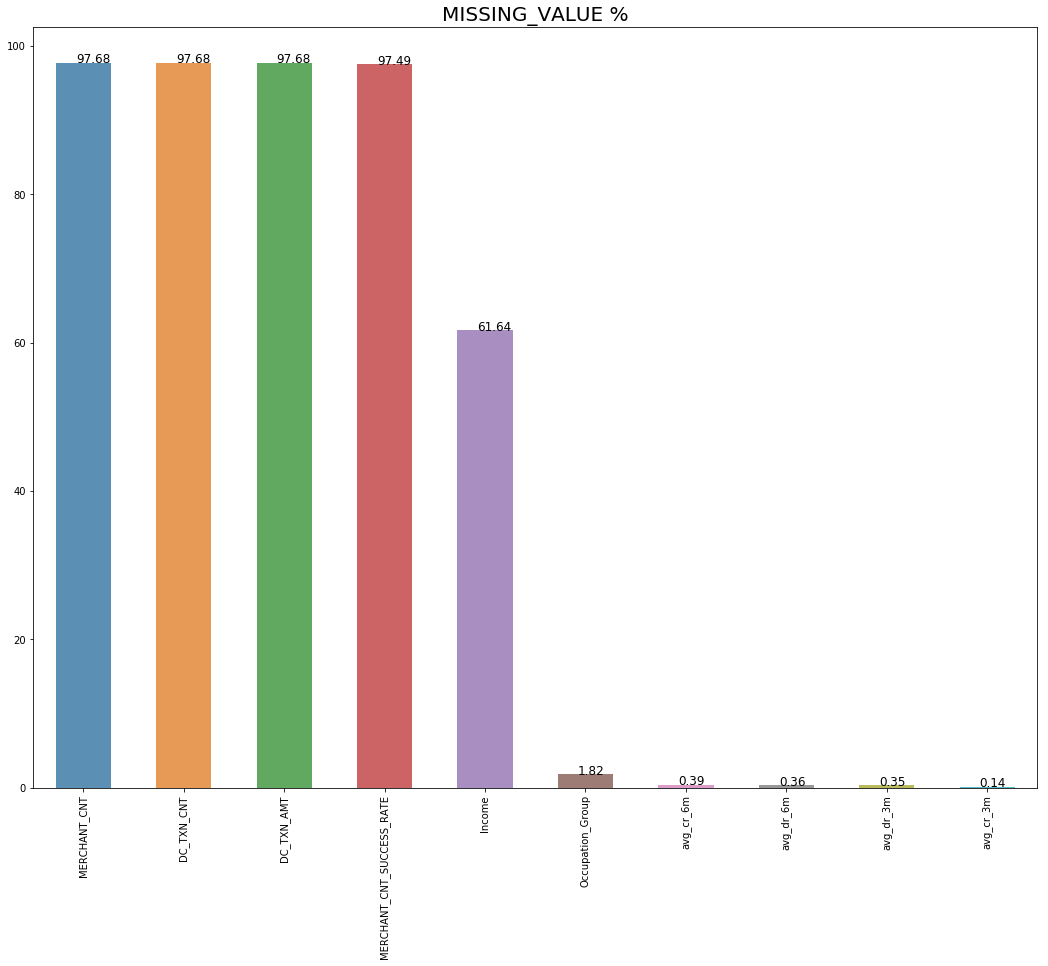

In [76]:
def missing_values_table(df6):
    mis_val = df6.isnull().sum()
    mis_val_percent = 100 * df6.isnull().sum() / len(df6)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
    print ("Your dataframe has " + str(df6.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    plt.figure(figsize=(18,14))
    ax=sns.barplot(mis_val_table_ren_columns.index, mis_val_table_ren_columns['% of Total Values'].values, alpha=0.8)
    for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title('MISSING_VALUE %',fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.xticks(rotation='vertical')
    plt.show()
missing_values_table(df6)

VALUE_COUNTS FOR EACH CATEGORY

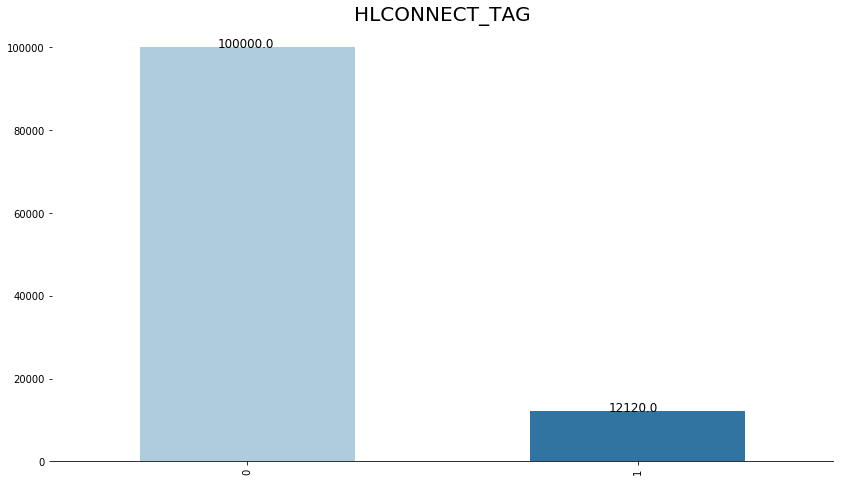

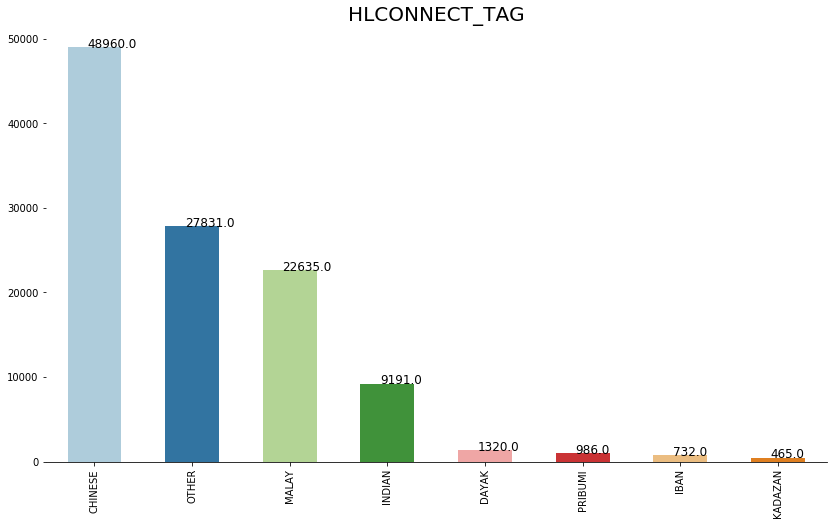

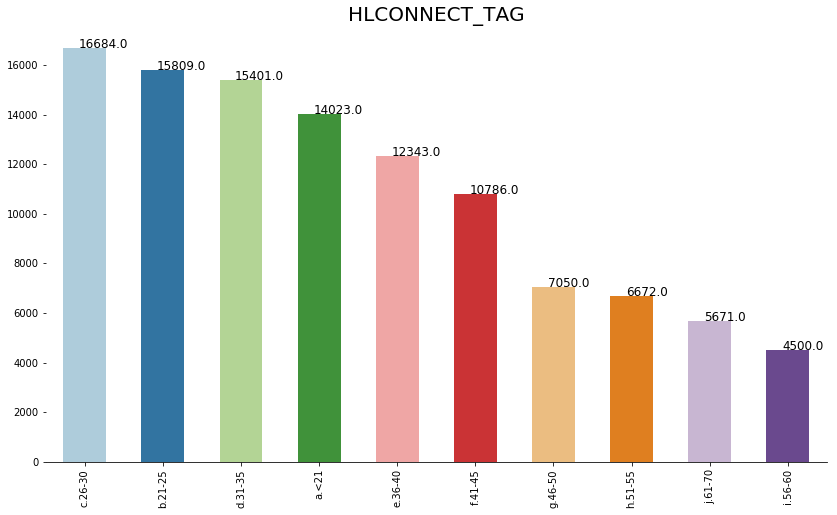

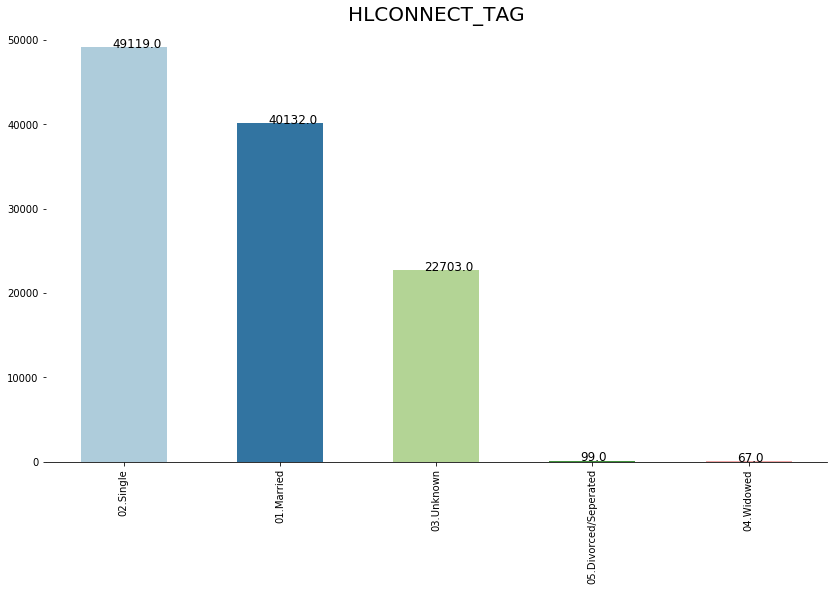

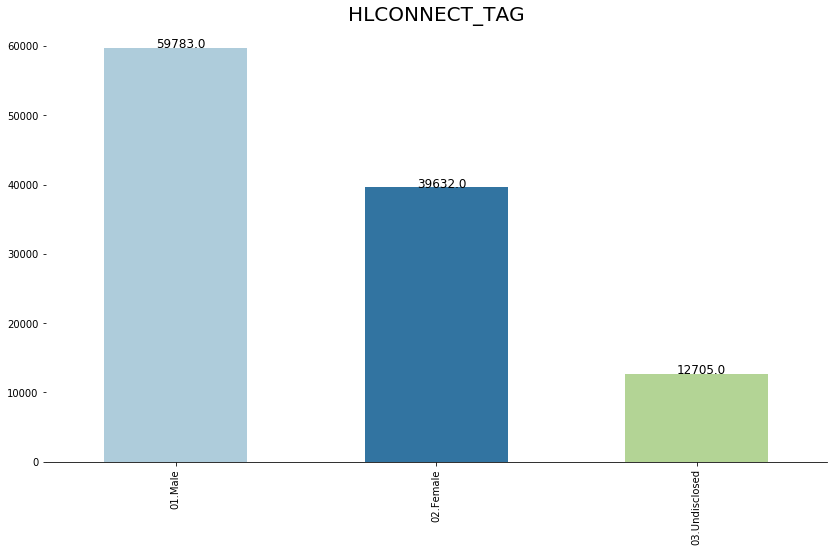

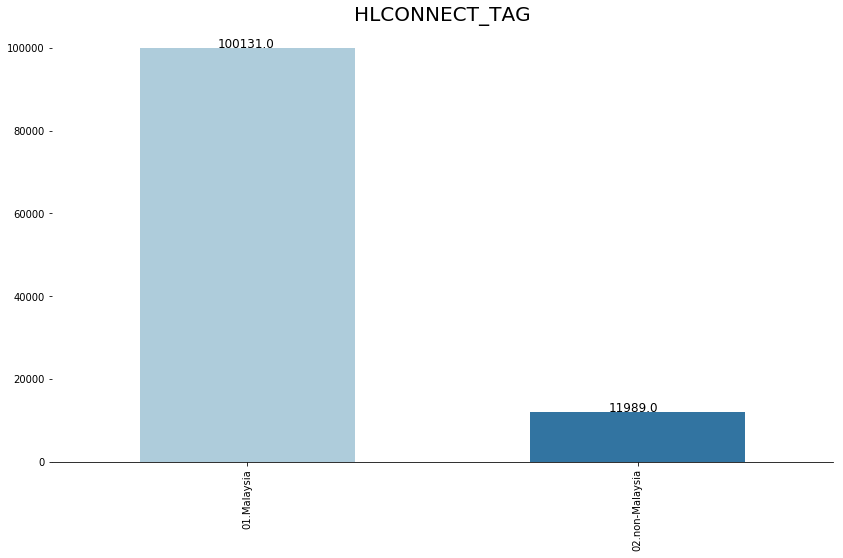

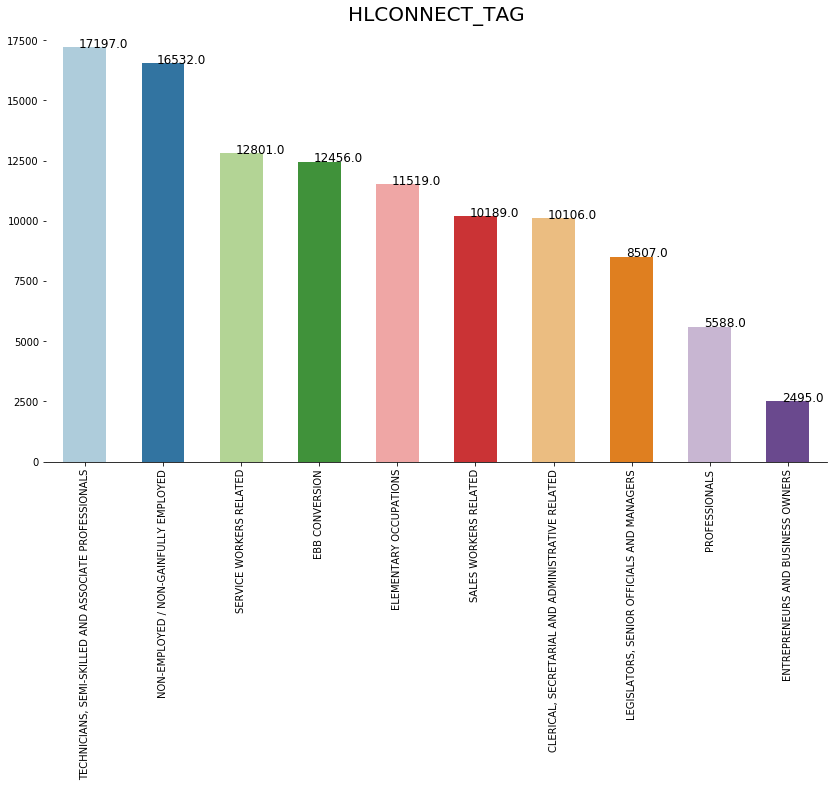

In [77]:
#category counts of each feature
cat_col=['target_var', 'race', 'Age_Band','Marital_status', 'Gender', 'Nationality','Occupation_Group']
for column in cat_col:
    def plot_categorical_count(df6, column, title='', limit=2, xtick_rotation='vertical'):
        column_count = df6[column].value_counts()[:limit]
        fig = plt.figure(figsize=(14, 8))
        ax=sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(var,fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.show(plot_categorical_count(df6, column, title=column, limit=10))

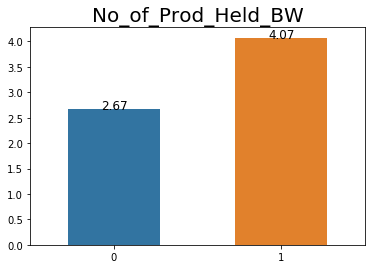

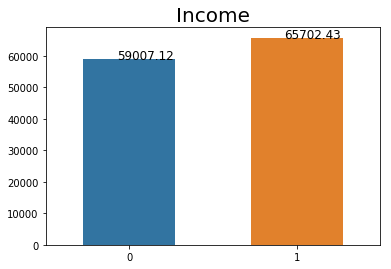

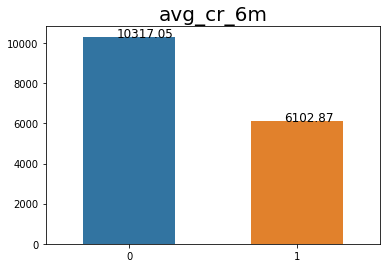

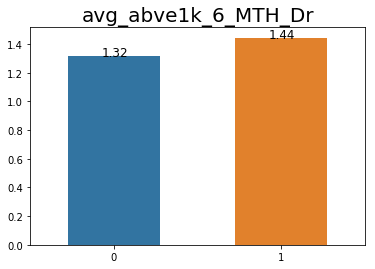

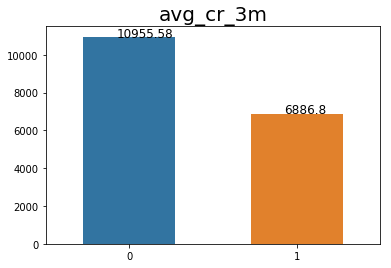

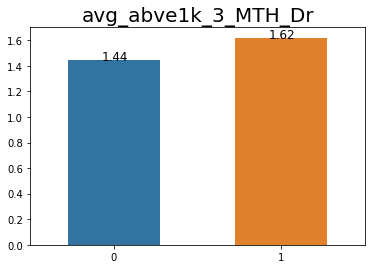

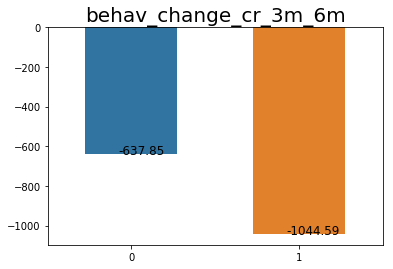

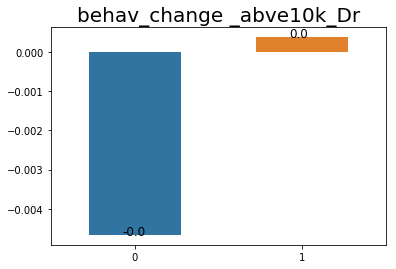

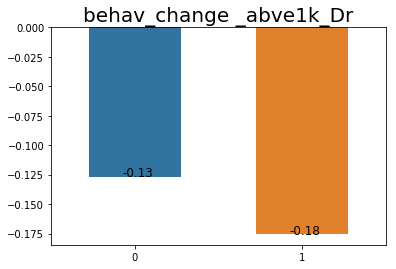

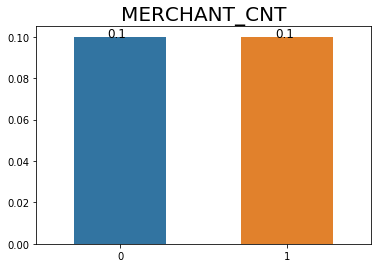

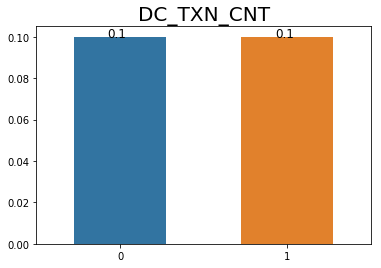

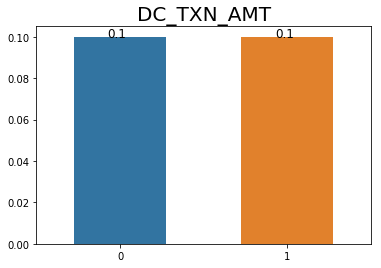

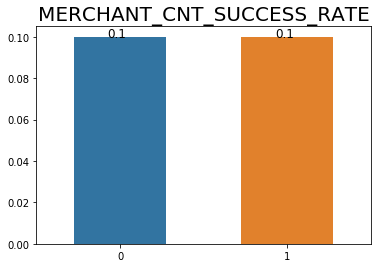

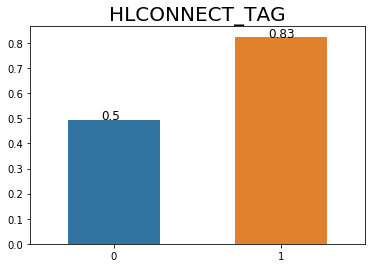

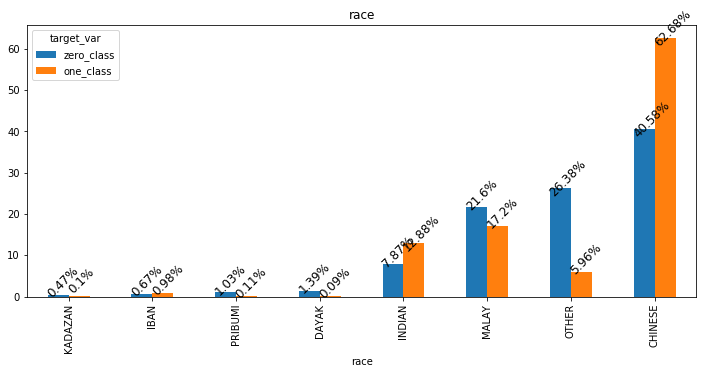

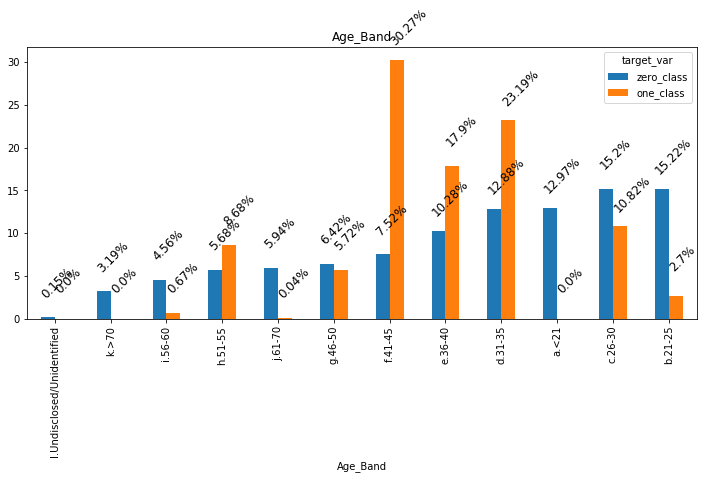

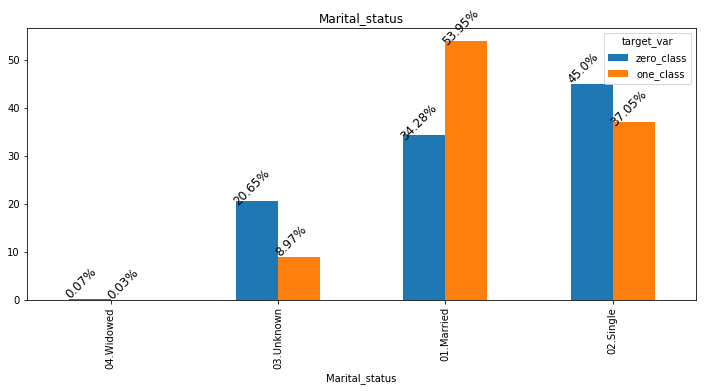

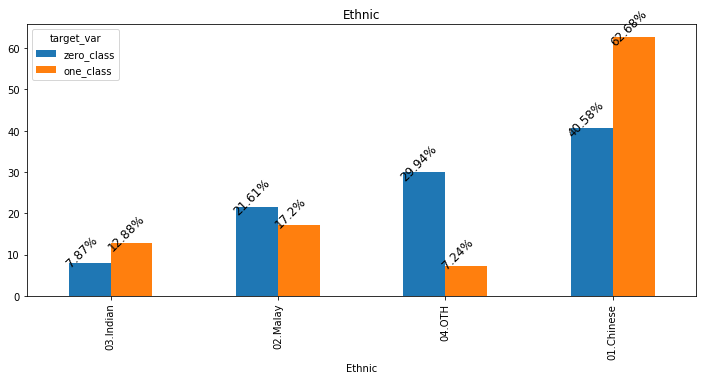

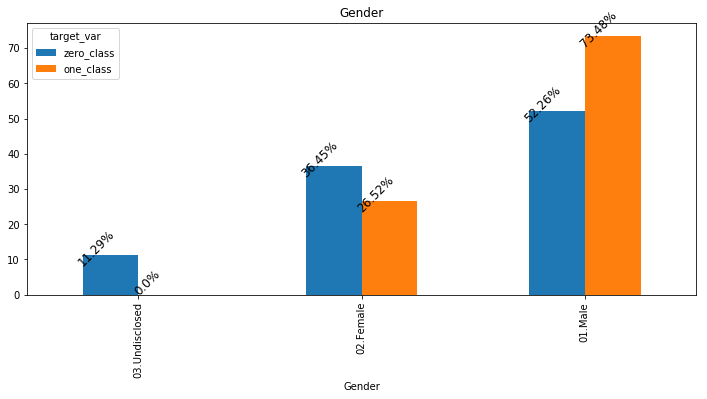

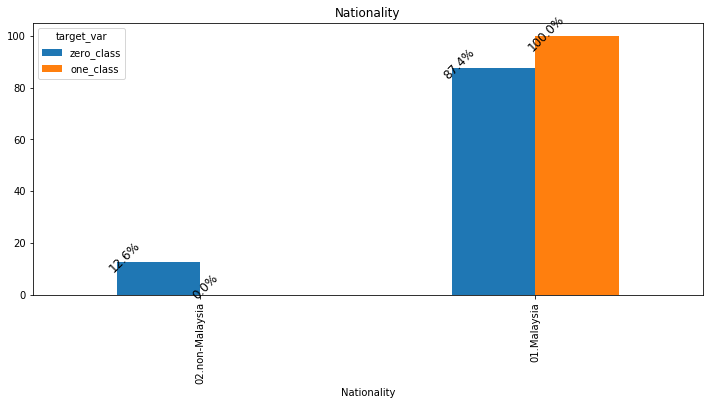

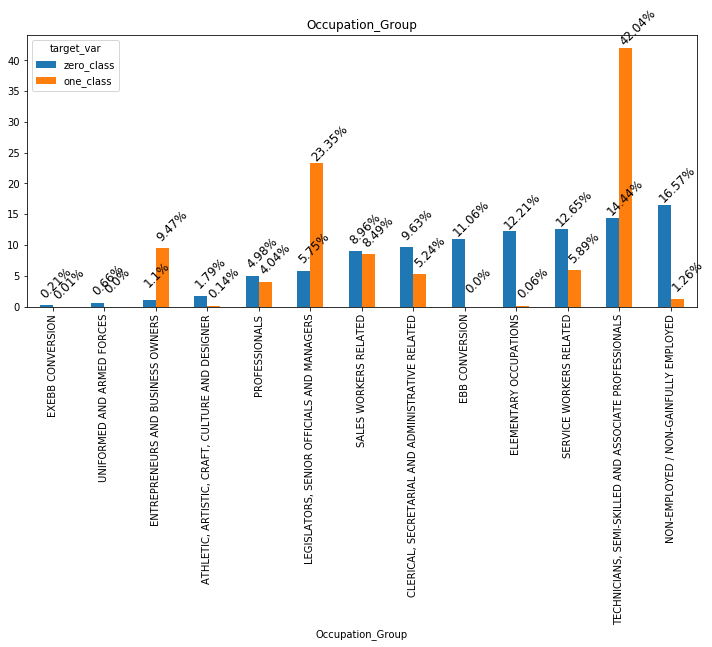

In [79]:
analysis=df9.drop('target_var',axis=1)
analysis.columns
cat_list=[]
num_list=[]
    
for feature in analysis.columns.tolist():
    if analysis[feature].dtype=='object':
        cat_list.append(feature)
    else:
        num_list.append(feature)
        
#num_lst=['avg_cr_3m', 'avg_cr_6m', 'behav_change_cr_3m_6m','behav_change _abve1k_Dr', 'avg_abve1k_6_MTH_Dr','avg_abve1k_3_MTH_Dr','HLCONNECT_TAG']
for var in num_list:
    def means(var):
        dff=df9[[var,'target_var']]
        g=dff.groupby('target_var').agg('mean')
        dfs = pd.DataFrame(g, index=[0,1]).rename(columns={0:'mean_zero_class',1:'mean_one_class'})
        ax=sns.barplot(x=dfs.index, y=np.array(dfs.values).ravel())
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(var,fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
            filename = 'C:\\Users\\tvimal\\Desktop\\' + str(var) +'.png'
            plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')
    plt.show(means(var))

#######################
#cat_lst=['Age_Band','Occupation_Group']
for name  in cat_list: 

    fnl=pd.crosstab(index=df9[name], columns=df9['target_var'])
    fnl['zero_class']=np.round(fnl[0]/fnl[0].sum(),4)*100
    fnl['one_class']=np.round(fnl[1]/fnl[1].sum(),4)*100
    okk=fnl[['zero_class','one_class']].sort_values(by='zero_class')#,ascending=False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    ax=okk[['zero_class','one_class']].plot(kind='bar', figsize=(12,5),title=name,grid=False)#subplots=True
    #plt.annotate( label,  (okk.index,okk['one_class'].values),   xytext=(0, space), textcoords="offset points", ha='center', va=va)
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03,i.get_height()+ 5,\
                str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)
        filename = 'C:\\Users\\tvimal\\Desktop\\' + str(name) +'.png'
        plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')

OUTLIERS IN EACH CATEGORY

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


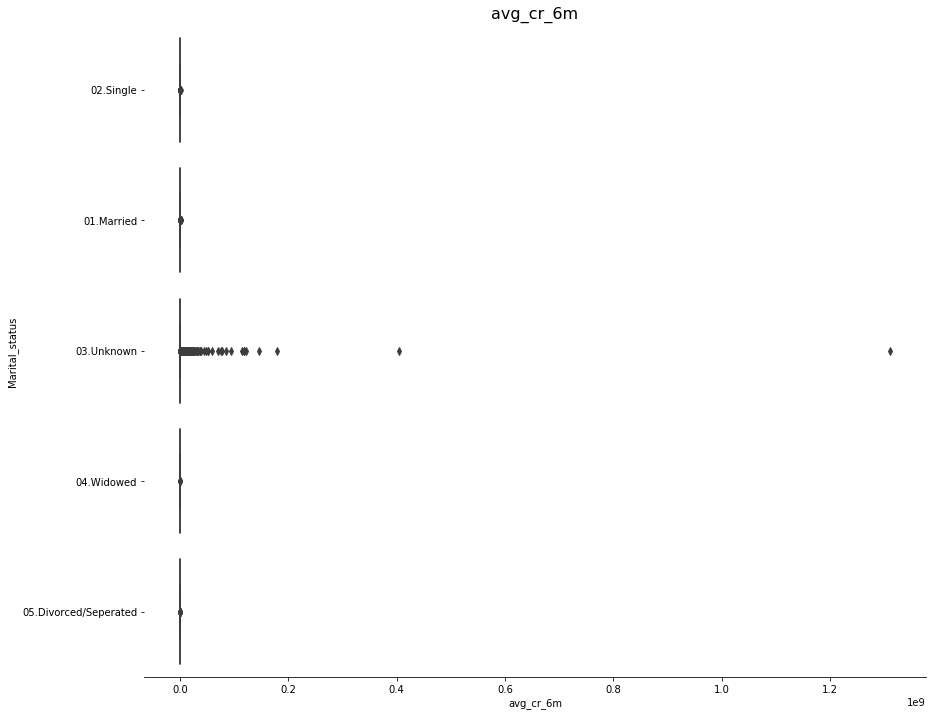

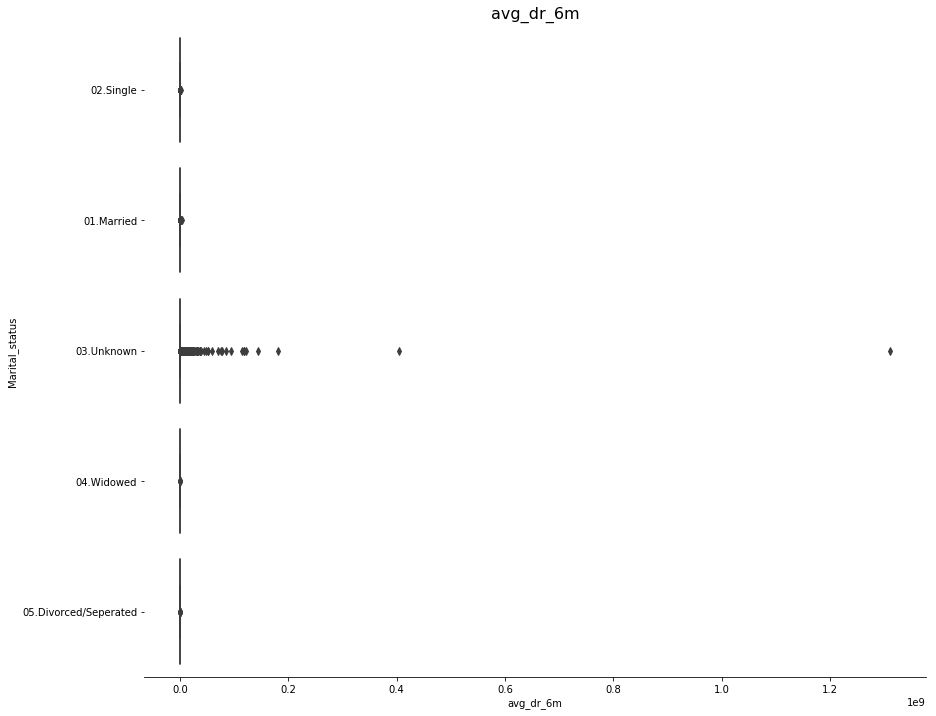

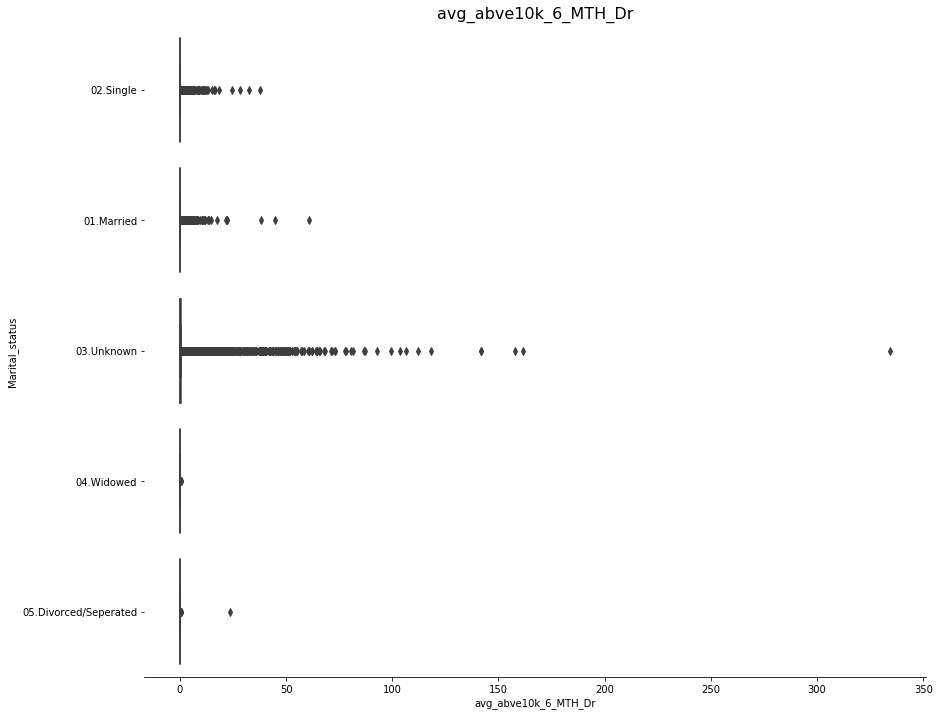

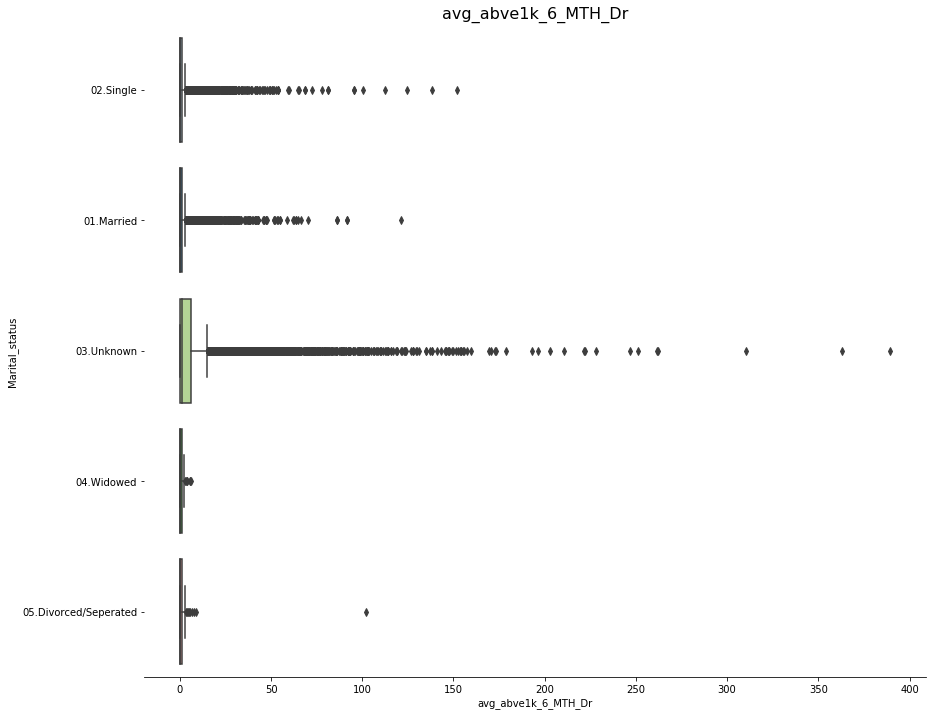

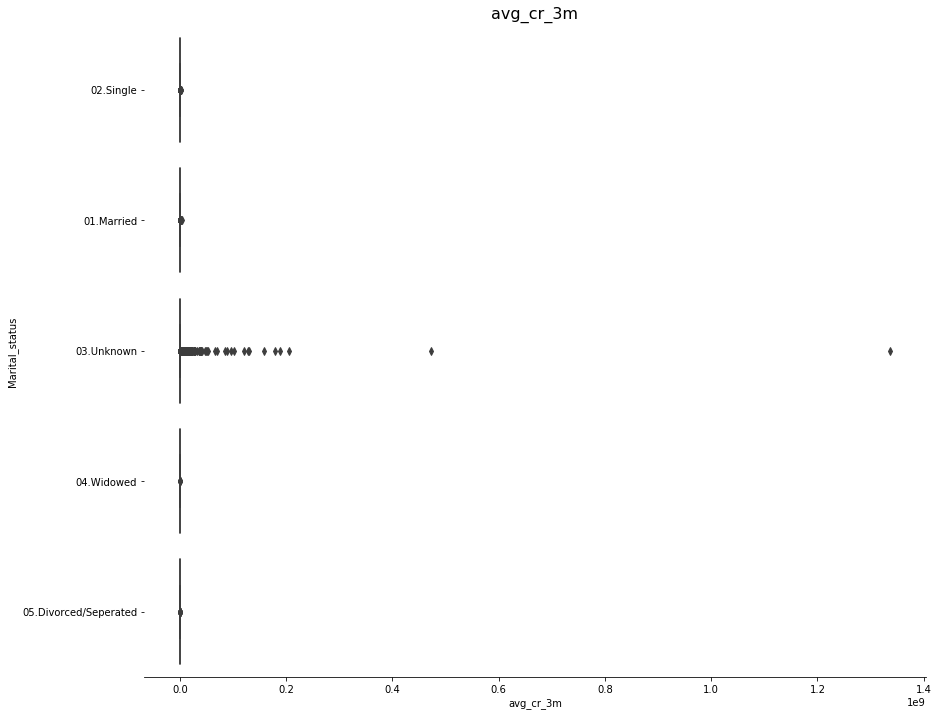

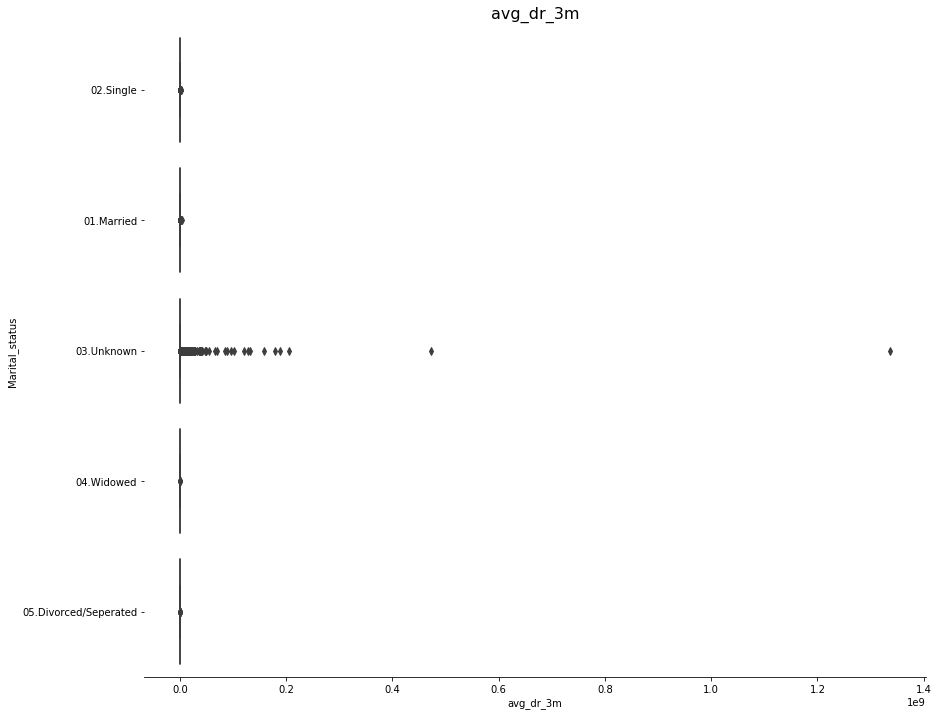

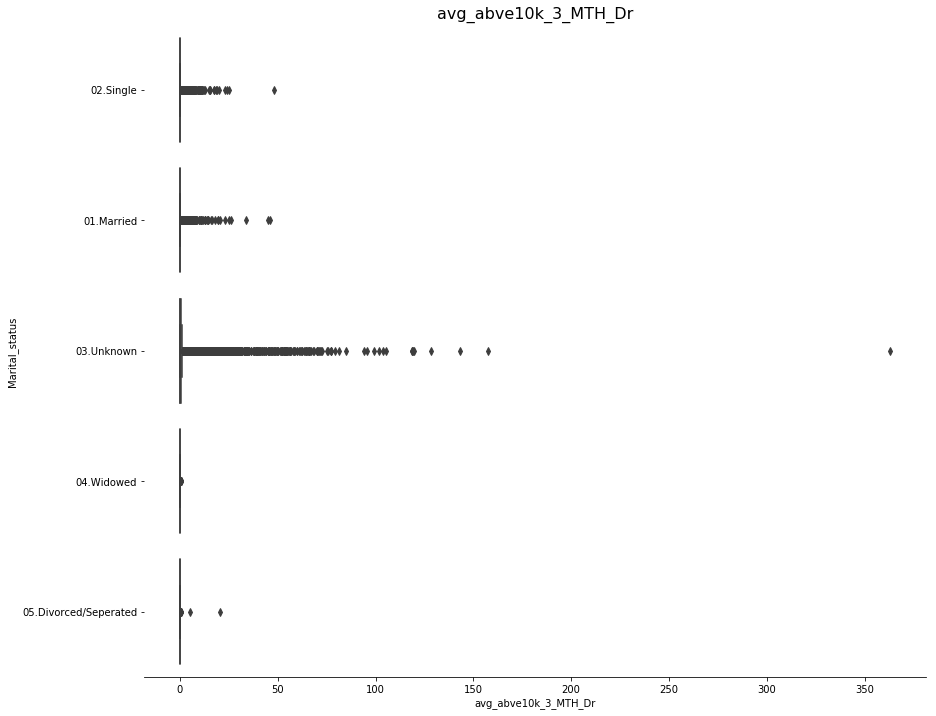

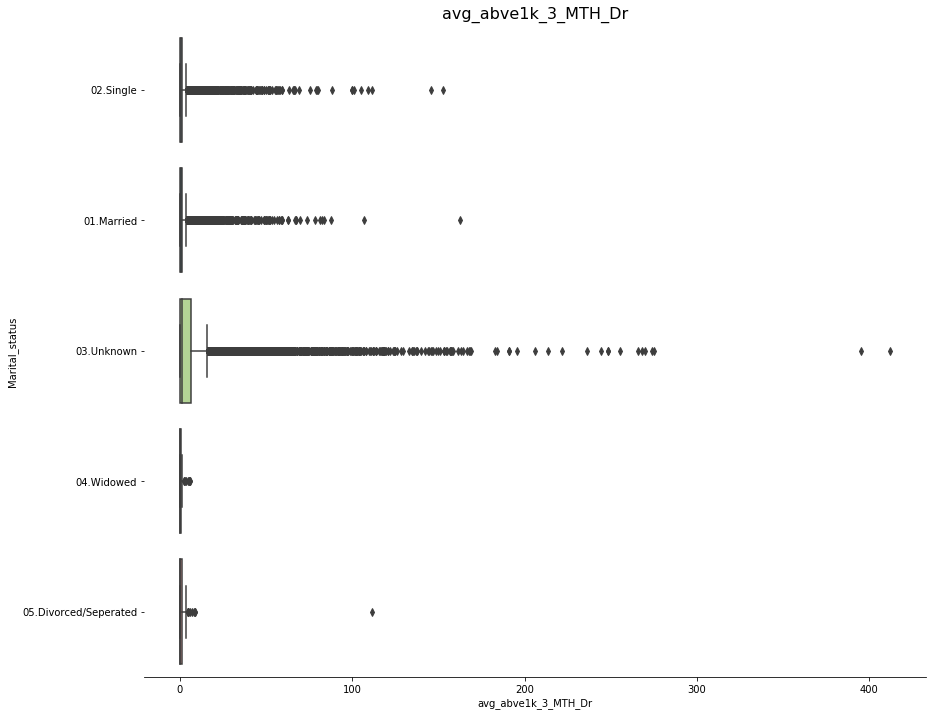

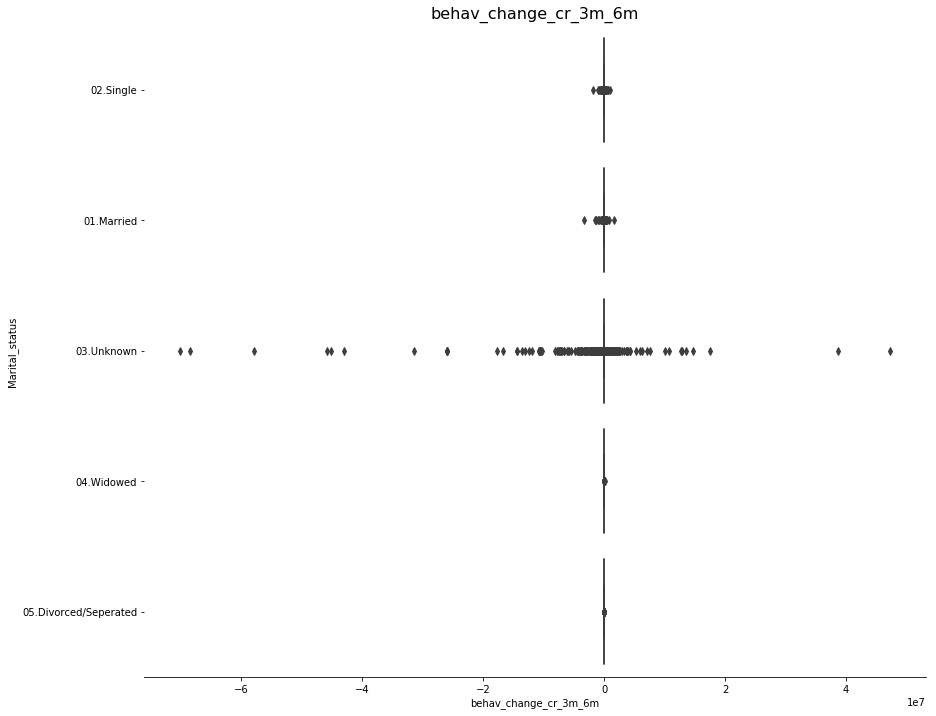

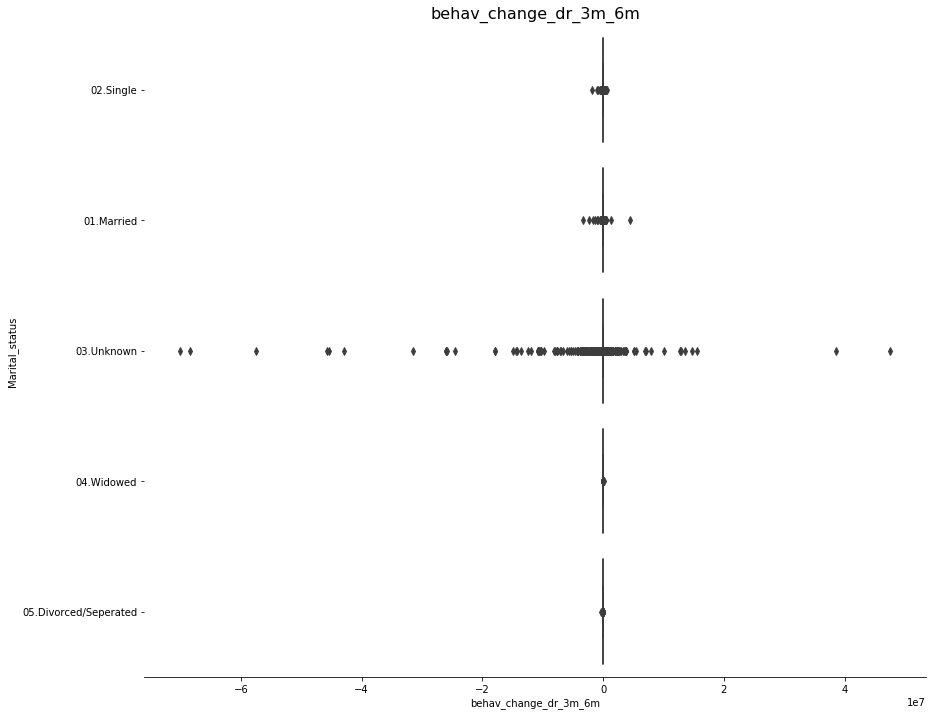

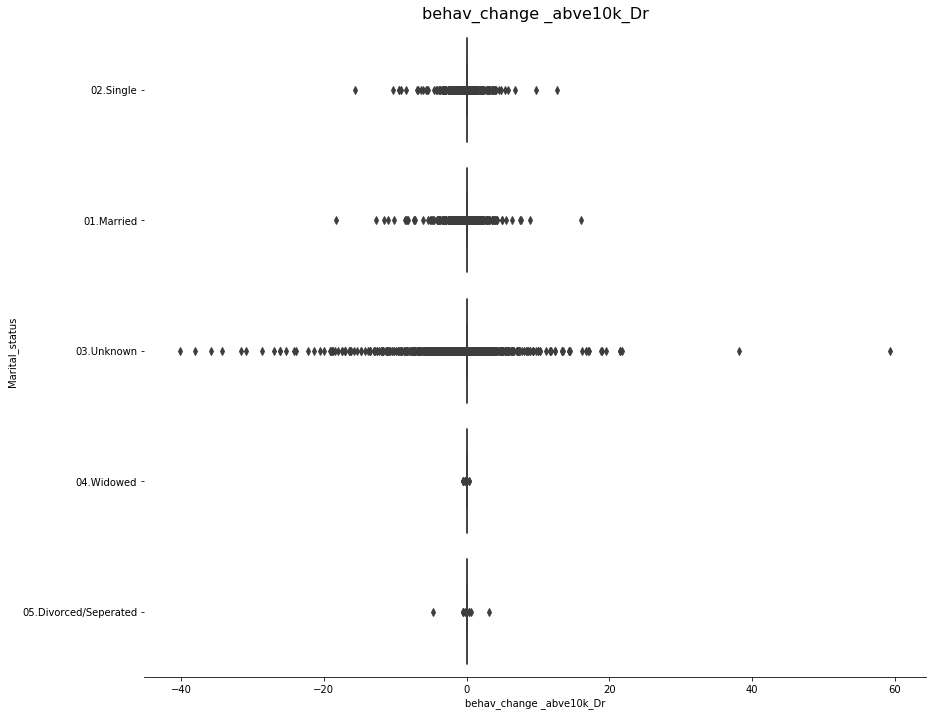

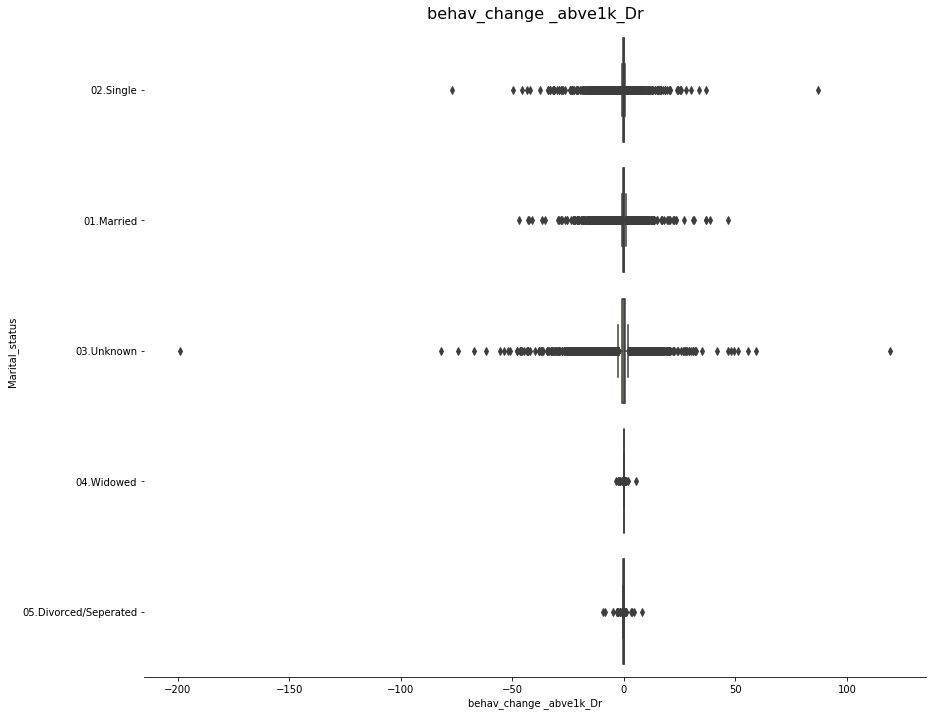

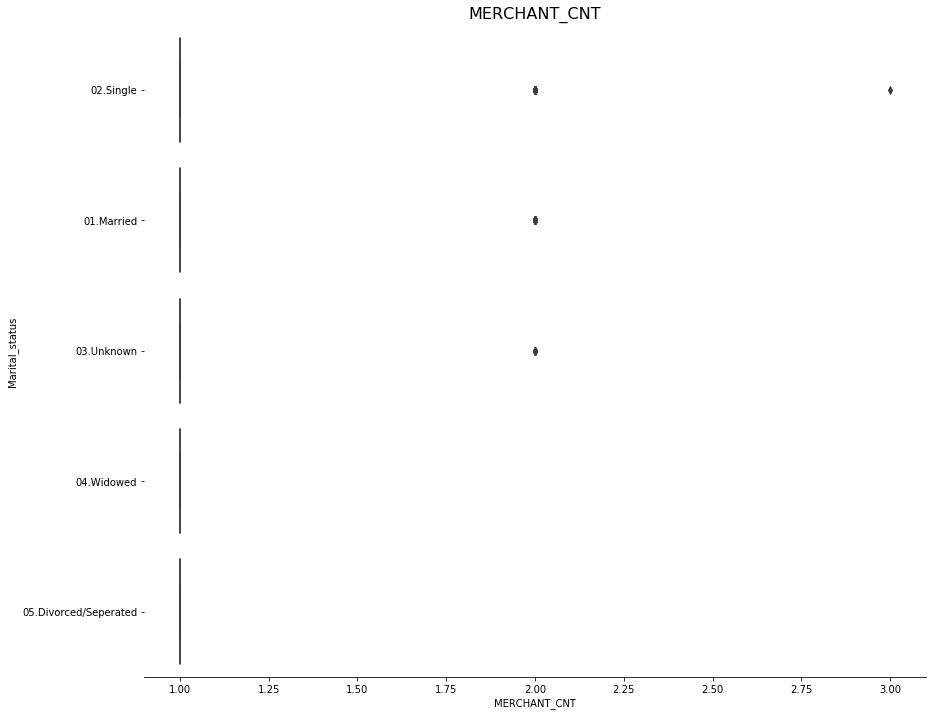

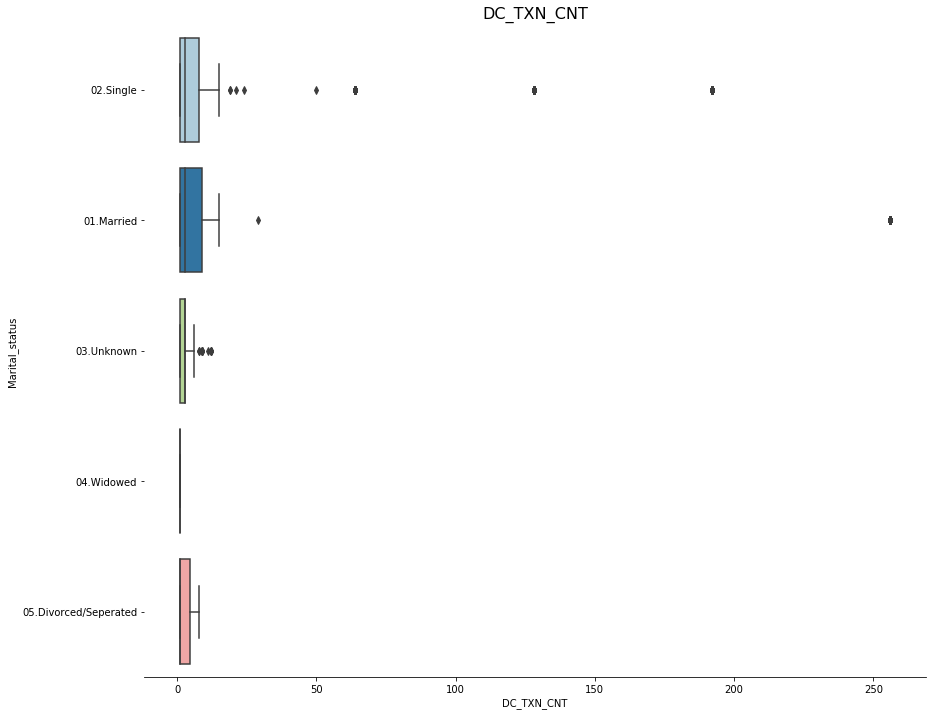

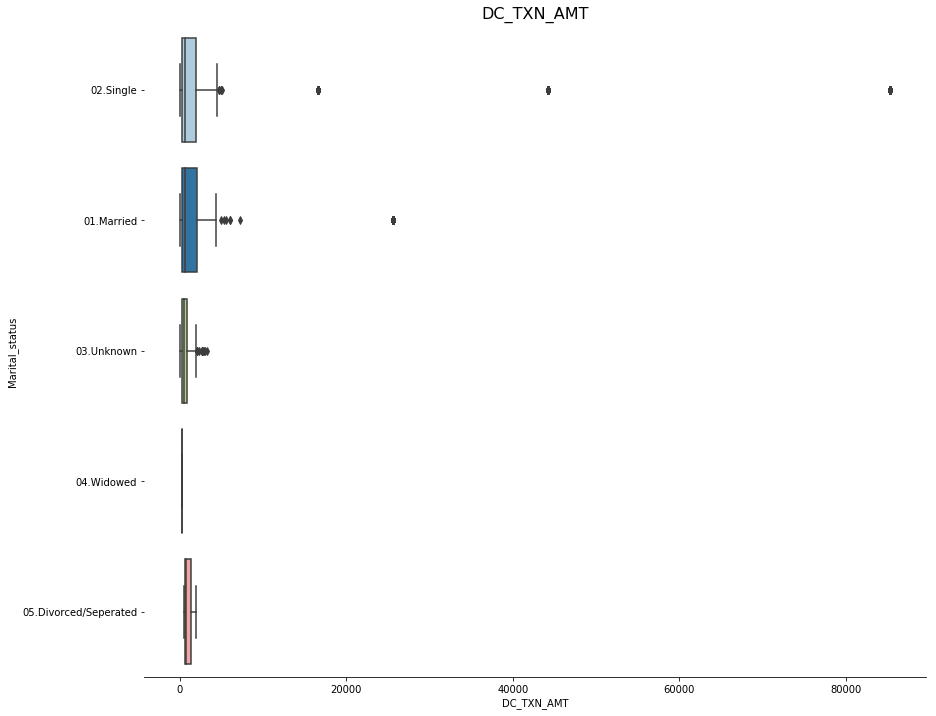

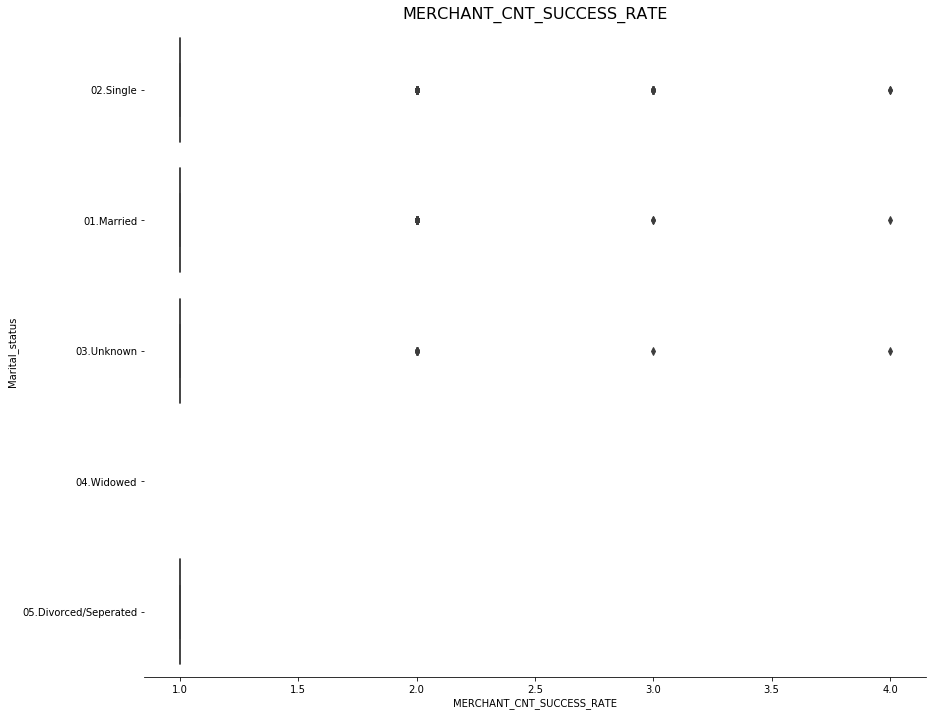

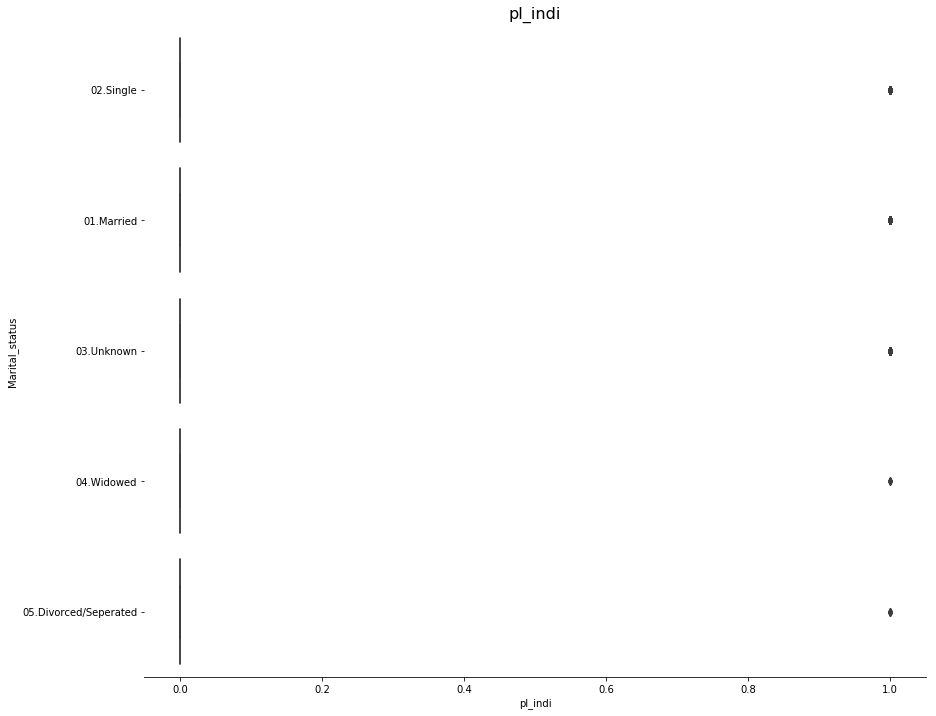

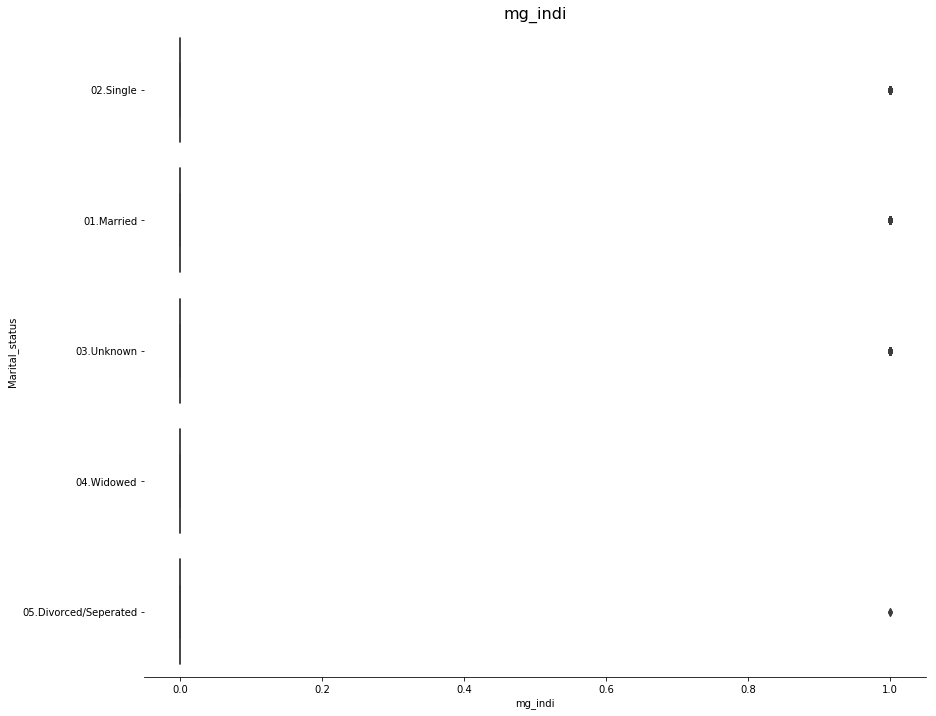

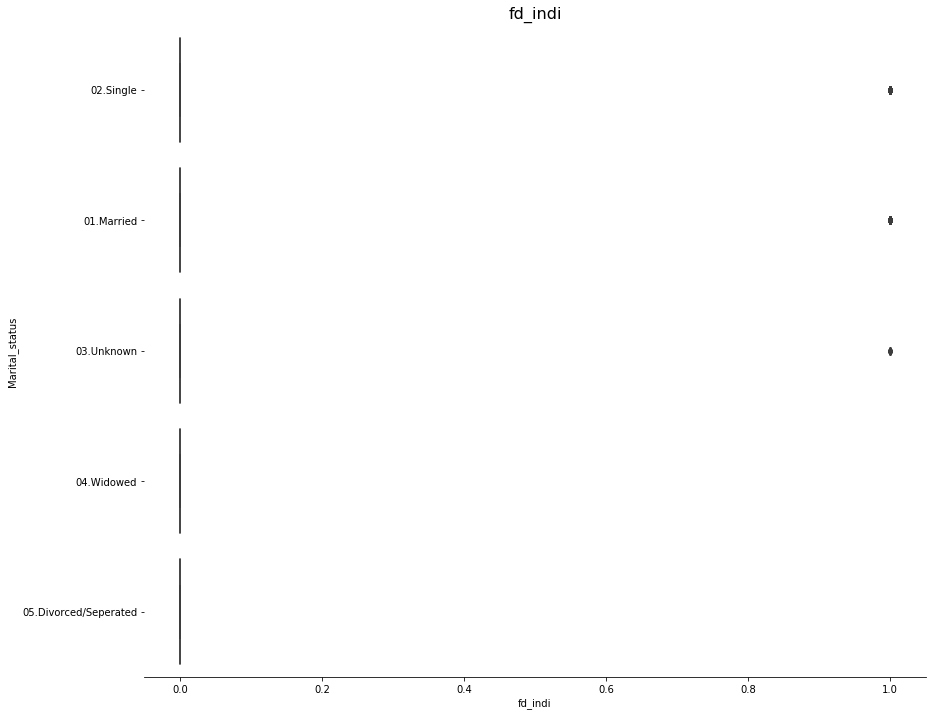

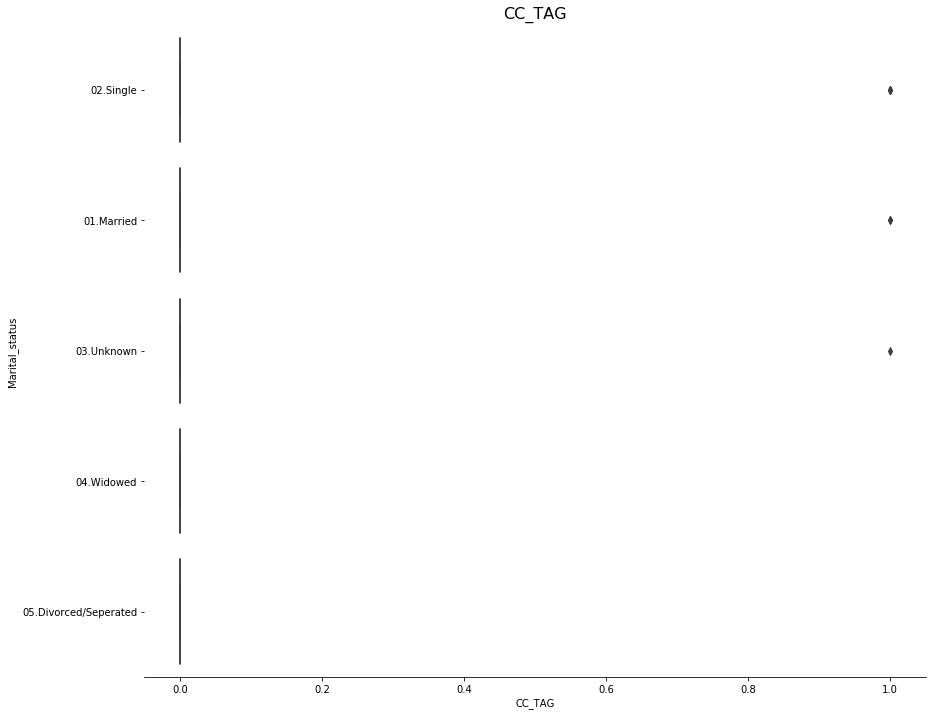

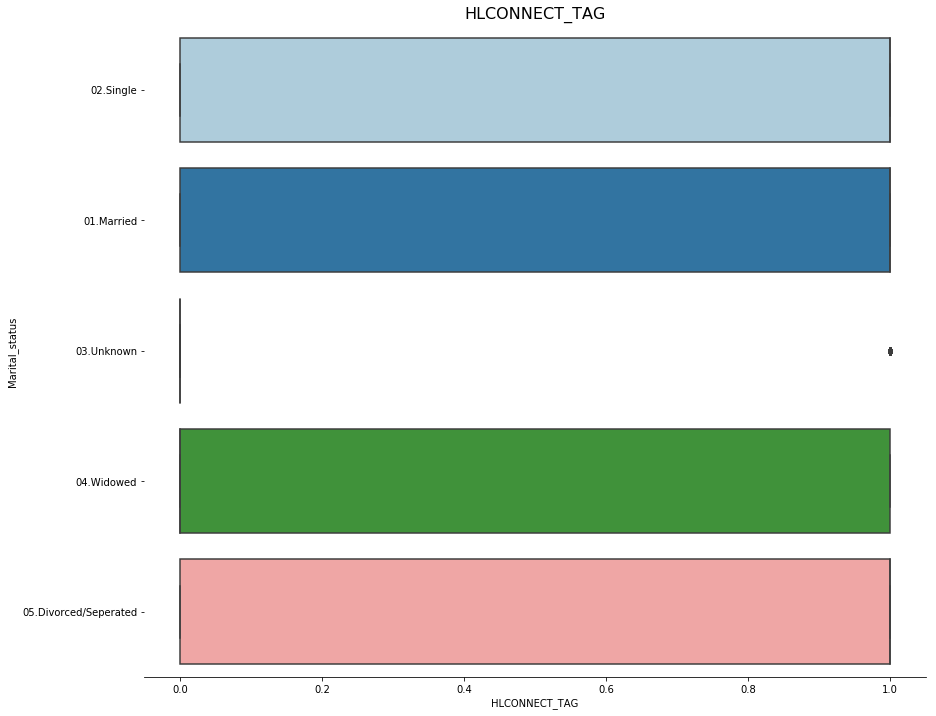

In [22]:
#outliers on each num-columns according to target_var
for i in num_col:
    def outliers(i)   :
        plt.figure(figsize=(14, 12))
        #df_top10 = df.where(df['target'].isin(df.target.values))#

        sns.boxplot(data=df6, x=i, y='Marital_status', palette='Paired')
        plt.title(i, fontsize=16)
        sns.despine(left=True)
    outliers(i)

In [24]:
df6['target_var'].value_counts()

0    100000
1     12120
Name: target_var, dtype: int64

# NULL HYPOTHESIS TEST

In [25]:
#chi square test for output variable with input categorical features
cat_col=[ 'race', 'Age_Band','Marital_status', 'Gender', 'Nationality','Occupation_Group']
for i in cat_col:
    def chi_test(i):
        table = pd.crosstab(index=df6[i], columns=df6['target_var'])
        table
        from scipy.stats import chi2_contingency
        stat, p, dof, expected = chi2_contingency(table)
        print( '%s ,chi_stat=%s ,p_value=%s' % (i,stat,p))
    chi_test(i)

race ,chi_stat=3980.456276247706 ,p_value=0.0
Age_Band ,chi_stat=10594.269397609347 ,p_value=0.0
Marital_status ,chi_stat=2551.0839005213825 ,p_value=0.0
Gender ,chi_stat=2853.0721339620254 ,p_value=0.0
Nationality ,chi_stat=1625.7918618764486 ,p_value=0.0
Occupation_Group ,chi_stat=19969.712816549 ,p_value=0.0


In [26]:
for num in num_col:  
    import numpy as np
    from scipy.stats import ttest_ind
    from scipy import stats
    tt=df6[['target_var',num]]
    tt.groupby('target_var').mean()
    tt=tt.replace(np.nan,0)
    tt=tt.replace(np.inf,0)
    tt=tt.replace(-np.inf,0)
    cat1 = tt[tt['target_var']==0]
    cat2 =tt[tt['target_var']==1]
    stat=stats.f_oneway(cat1[num], cat2[num])
   # print(num,'      '  ,stats.f_oneway(cat1[num], cat2[num]))
    print(num,'  ',stat)

avg_cr_6m    F_onewayResult(statistic=1.9148314436606277, pvalue=0.16643031504102512)
avg_dr_6m    F_onewayResult(statistic=1.9190030933969586, pvalue=0.16596935633201698)
avg_abve10k_6_MTH_Dr    F_onewayResult(statistic=104.60671871679321, pvalue=1.5269848342726162e-24)
avg_abve1k_6_MTH_Dr    F_onewayResult(statistic=18.025762236803452, pvalue=2.181107804595046e-05)
avg_cr_3m    F_onewayResult(statistic=2.1418223585434792, pvalue=0.14333434108164908)
avg_dr_3m    F_onewayResult(statistic=2.1412912789517473, pvalue=0.14338396271380913)
avg_abve10k_3_MTH_Dr    F_onewayResult(statistic=101.75611369420405, pvalue=6.429091121271296e-24)
avg_abve1k_3_MTH_Dr    F_onewayResult(statistic=21.094947881670887, pvalue=4.375532600439576e-06)
behav_change_cr_3m_6m    F_onewayResult(statistic=1.5430236016607164, pvalue=0.214170906893847)
behav_change_dr_3m_6m    F_onewayResult(statistic=1.5185644366973934, pvalue=0.21783945028112753)
behav_change _abve10k_Dr    F_onewayResult(statistic=4.742899340147

In [27]:
Non_significant_features=['CC_TAG','fd_indi','mg_indi','pl_indi' ,'behav_change' '_abve10k_Dr' ,'behav_change_dr_3m_6m']

# MULTICOLLINEARITY

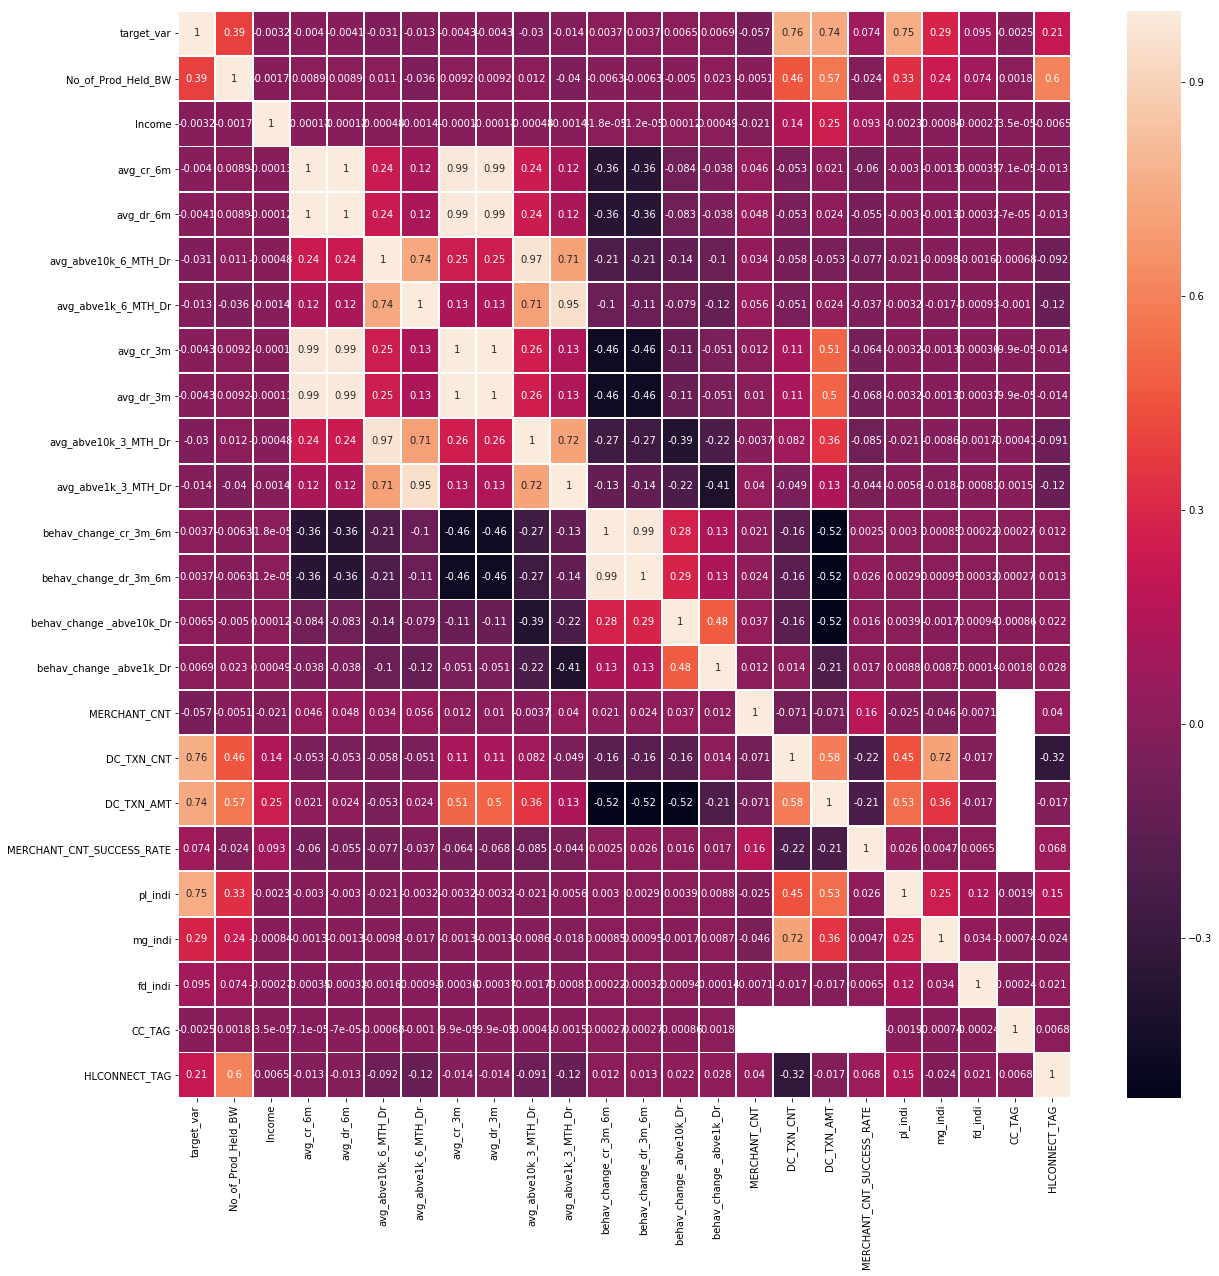

In [28]:
matrix=df6.corr()
matrix
plt.figure(figsize = (20,20))
sns.heatmap(matrix, annot=True,linewidths=1)

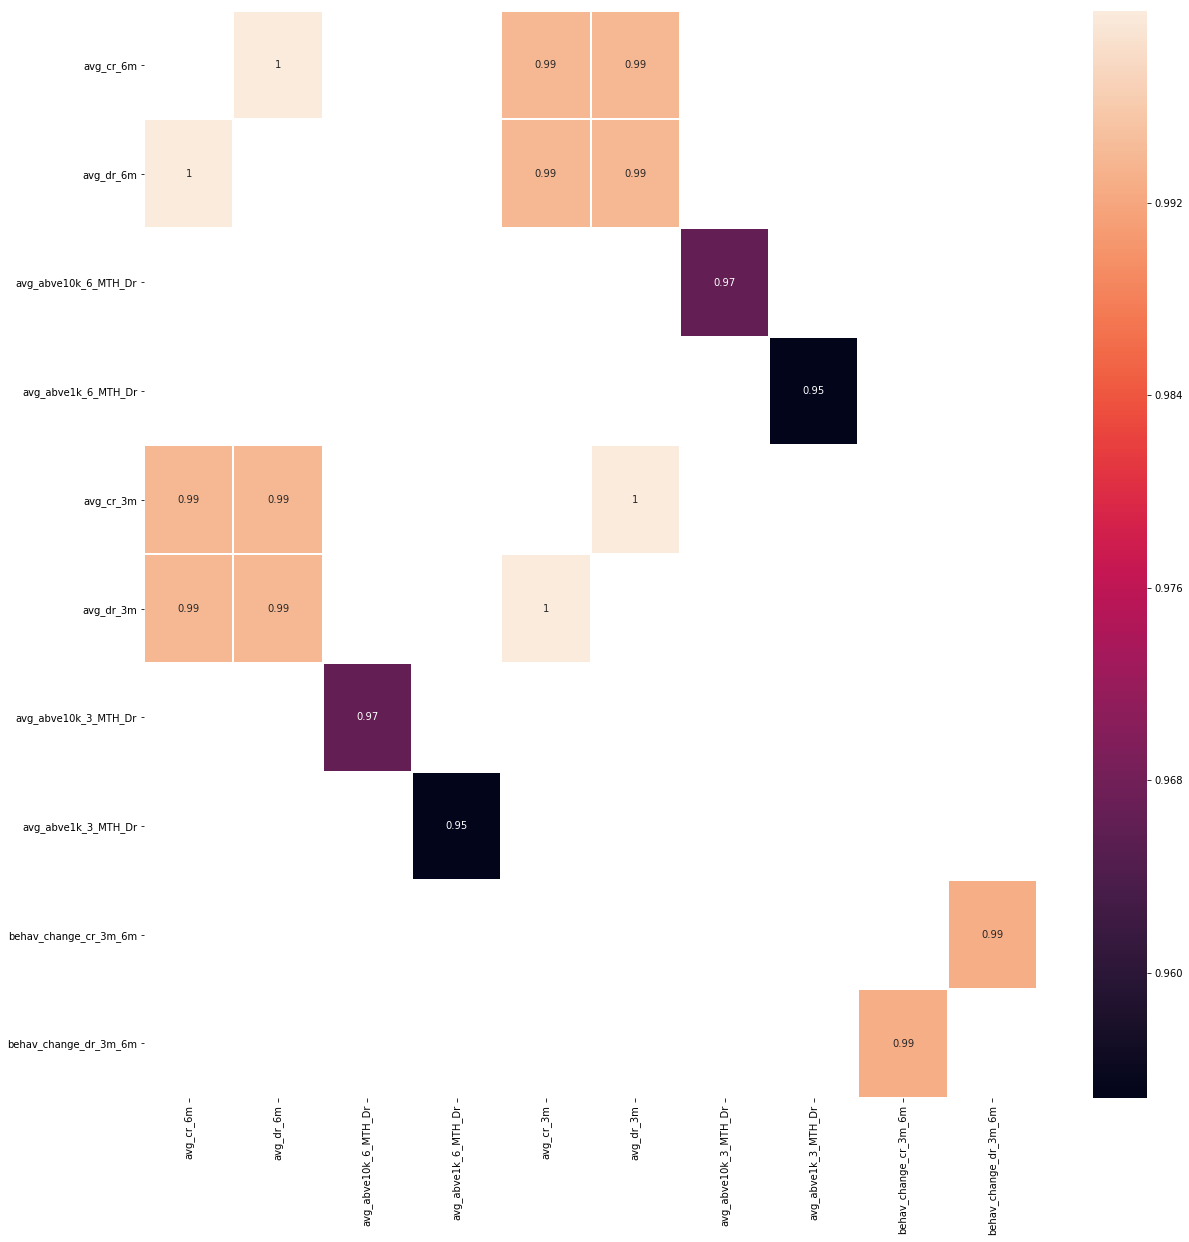

In [29]:
matrix=df6.corr()

corrltd=matrix[matrix>0.8]
corrltd=corrltd.replace(1,np.nan)
corrltd=corrltd.dropna(how='all')
corrltd=corrltd.dropna(how='all',axis=1)
print()
plt.figure(figsize = (20,20))
sns.heatmap(corrltd, annot=True,linewidths=1)

In [30]:
correlated_columns=corrltd.columns.tolist()
#need to drop these columns
cor_col=['avg_dr_6m','avg_abve10k_6_MTH_Dr','avg_dr_3m','avg_abve10k_3_MTH_Dr','behav_change_dr_3m_6m']


# variance inflation factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif=df6[['avg_abve10k_6_MTH_Dr','avg_abve10k_3_MTH_Dr','behav_change_dr_3m_6m']]
viff=df6.replace(np.nan,0)
X = add_constant(vif)

pd.Series([variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])], 
              index=X.columns)


const                     1.013193
avg_abve10k_6_MTH_Dr     15.818786
avg_abve10k_3_MTH_Dr     16.309857
behav_change_dr_3m_6m     1.126304
dtype: float64

In [32]:
viff=df6.replace(np.nan,0)
viff.columns

Index(['target_var', 'race', 'Age_Band', 'Marital_status', 'Ethnic', 'Gender',
       'Nationality', 'Occupation_Group', 'No_of_Prod_Held_BW', 'Income',
       'avg_cr_6m', 'avg_dr_6m', 'avg_abve10k_6_MTH_Dr', 'avg_abve1k_6_MTH_Dr',
       'avg_cr_3m', 'avg_dr_3m', 'avg_abve10k_3_MTH_Dr', 'avg_abve1k_3_MTH_Dr',
       'behav_change_cr_3m_6m', 'behav_change_dr_3m_6m',
       'behav_change _abve10k_Dr', 'behav_change _abve1k_Dr', 'MERCHANT_CNT',
       'DC_TXN_CNT', 'DC_TXN_AMT', 'MERCHANT_CNT_SUCCESS_RATE', 'pl_indi',
       'mg_indi', 'fd_indi', 'CC_TAG', 'HLCONNECT_TAG'],
      dtype='object')

In [33]:
df7=df6.drop(['CC_TAG','fd_indi','mg_indi','pl_indi' ,'avg_dr_6m','avg_abve10k_6_MTH_Dr','avg_dr_3m','avg_abve10k_3_MTH_Dr','behav_change_dr_3m_6m'],axis=1)
df7.shape

(112120, 22)

#Preparing data for outlier detection

In [34]:
#df7.isnull().any()

#for category imputation
df7['Occupation_Group']=df7['Occupation_Group'].replace(np.nan,'TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFESSIONALS')
#fro continuous data
'''from sklearn.preprocessing import Imputer
columns_to_impute = ['Income' ,'avg_cr_6m','avg_cr_3m']
df7[columns_to_impute] = Imputer().fit_transform(df7[columns_to_impute])'''
##########
df7[['Income' ,'avg_cr_6m','avg_cr_3m']]=df7[['Income' ,'avg_cr_6m','avg_cr_3m']].replace(np.nan,1001)

#for nominal features
df7[['MERCHANT_CNT','DC_TXN_CNT' ,'DC_TXN_AMT','MERCHANT_CNT_SUCCESS_RATE']] =df7[['MERCHANT_CNT','DC_TXN_CNT' ,'DC_TXN_AMT','MERCHANT_CNT_SUCCESS_RATE']].replace(np.nan,0.1)
df7.isnull().any()

target_var                   False
race                         False
Age_Band                     False
Marital_status               False
Ethnic                       False
Gender                       False
Nationality                  False
Occupation_Group             False
No_of_Prod_Held_BW           False
Income                       False
avg_cr_6m                    False
avg_abve1k_6_MTH_Dr          False
avg_cr_3m                    False
avg_abve1k_3_MTH_Dr          False
behav_change_cr_3m_6m        False
behav_change _abve10k_Dr     False
behav_change _abve1k_Dr      False
MERCHANT_CNT                 False
DC_TXN_CNT                   False
DC_TXN_AMT                   False
MERCHANT_CNT_SUCCESS_RATE    False
HLCONNECT_TAG                False
dtype: bool

# outlier_detection

In [35]:
df8=df7.drop(['target_var'],axis=1)
df8.shape

(112120, 21)

In [36]:
# Categorical boolean mask
categorical_feature_mask = df8.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df8.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df8[categorical_cols] = df8[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))

In [37]:
import numpy as np
from scipy import stats
after_outliers=df8[(np.abs(stats.zscore(df8)) <3).all(axis=1)]

In [38]:
df9=df7[df7.index.isin(after_outliers.index)]
df9.shape
df9['target_var'].value_counts()

0    92941
1    10435
Name: target_var, dtype: int64

# Imputation

In [39]:
from sklearn.preprocessing import Imputer
df9[['avg_cr_6m','avg_cr_3m']]=df9[['avg_cr_6m','avg_cr_3m']].replace(1001,np.nan)
columns_to_impute = ['avg_cr_6m','avg_cr_3m']
df9[columns_to_impute] = Imputer().fit_transform(df9[columns_to_impute])

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

# Splitting train test 

In [40]:
print(df9.shape)
df9.columns

(103376, 22)


Index(['target_var', 'race', 'Age_Band', 'Marital_status', 'Ethnic', 'Gender',
       'Nationality', 'Occupation_Group', 'No_of_Prod_Held_BW', 'Income',
       'avg_cr_6m', 'avg_abve1k_6_MTH_Dr', 'avg_cr_3m', 'avg_abve1k_3_MTH_Dr',
       'behav_change_cr_3m_6m', 'behav_change _abve10k_Dr',
       'behav_change _abve1k_Dr', 'MERCHANT_CNT', 'DC_TXN_CNT', 'DC_TXN_AMT',
       'MERCHANT_CNT_SUCCESS_RATE', 'HLCONNECT_TAG'],
      dtype='object')

In [41]:
train=df9.drop(['target_var','No_of_Prod_Held_BW','Income','MERCHANT_CNT', 'DC_TXN_CNT', 'DC_TXN_AMT',
       'MERCHANT_CNT_SUCCESS_RATE','race', 'Nationality', 'Ethnic',],axis=1)#'occp_desc'
x=pd.get_dummies(train)
print(train.shape)
print(x.shape)
print(train.columns.tolist())
y=df9['target_var']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

(103376, 12)
(103376, 40)
['Age_Band', 'Marital_status', 'Gender', 'Occupation_Group', 'avg_cr_6m', 'avg_abve1k_6_MTH_Dr', 'avg_cr_3m', 'avg_abve1k_3_MTH_Dr', 'behav_change_cr_3m_6m', 'behav_change _abve10k_Dr', 'behav_change _abve1k_Dr', 'HLCONNECT_TAG']


# Normalising Data

In [42]:
#normalizing the data
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)
X_test

array([[-1.44212795e-01, -4.74197944e-01, -1.41128526e-01, ...,
        -3.69599140e-01, -4.56272352e-01, -7.68626379e-02],
       [-1.28137458e-01, -4.74197944e-01, -1.19162262e-01, ...,
        -3.69599140e-01, -4.56272352e-01, -7.68626379e-02],
       [ 7.48249399e-02, -2.37737806e-01,  5.36894352e-02, ...,
        -3.69599140e-01, -4.56272352e-01, -7.68626379e-02],
       ...,
       [-8.52924964e-02, -1.27766834e-03, -1.33419161e-01, ...,
        -3.69599140e-01, -4.56272352e-01, -7.68626379e-02],
       [-1.38117592e-01, -4.74197944e-01, -1.32734082e-01, ...,
        -3.69599140e-01, -4.56272352e-01, -7.68626379e-02],
       [-1.41379135e-01, -4.74197944e-01, -1.40577132e-01, ...,
        -3.69599140e-01,  2.19167345e+00, -7.68626379e-02]])

# Sampling

In [43]:
# upsampling fro imbalanced dataset.
x_train_res,y_train_res=SMOTE().fit_sample(X_train, y_train)
n_cols=x_train_res.shape[1]
n_cols

40

# Neural_network 

In [44]:
#def create_model(optimizer='adam', init='uniform'):

Classifier=Sequential()
Classifier.add(Dense( units=30,activation="relu", kernel_initializer="uniform",input_dim=n_cols,)) 
#Classifier.add(Dropout(rate=0.2))

Classifier.add(Dense(activation="relu", units=20, kernel_initializer="uniform")) 
#Classifier.add(Dropout(rate=0.3))
Classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform")) 
#Classifier.add(Dropout(rate=0.3))
#EarlyStopping(monitor='val_err',patience=10)
Classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#return Classifier
Classifier.fit(x_train_res, y_train_res, batch_size = 32,epochs =20,validation_data = (X_test, y_test) )#,

Train on 130048 samples, validate on 31013 samples
Epoch 1/20
130048/130048 [==============================] - 5s 37us/step - loss: 0.3011 - acc: 0.8710 - val_loss: 0.3106 - val_acc: 0.8586
Epoch 2/20
130048/130048 [==============================] - 4s 32us/step - loss: 0.2600 - acc: 0.8881 - val_loss: 0.2722 - val_acc: 0.8773
Epoch 3/20
130048/130048 [==============================] - 4s 30us/step - loss: 0.2499 - acc: 0.8911 - val_loss: 0.2298 - val_acc: 0.8971
Epoch 4/20
130048/130048 [==============================] - 4s 30us/step - loss: 0.2439 - acc: 0.8940 - val_loss: 0.2503 - val_acc: 0.8903
Epoch 5/20
130048/130048 [==============================] - 4s 31us/step - loss: 0.2392 - acc: 0.8950 - val_loss: 0.2906 - val_acc: 0.8804
Epoch 6/20
130048/130048 [==============================] - 4s 34us/step - loss: 0.2349 - acc: 0.8964 - val_loss: 0.2646 - val_acc: 0.8900
Epoch 7/20
130048/130048 [==============================] - 4s 32us/step - loss: 0.2325 - acc: 0.8979 - val_loss: 0

In [45]:
Classifier.get_weights()

[array([[ 1.0129011 , -1.2913697 , -3.0208085 , ...,  0.45862183,
         -0.5949829 , -0.85912883],
        [ 0.07030571,  0.07293466, -0.29376268, ..., -1.023807  ,
         -0.03911635,  0.26853535],
        [ 1.1713957 , -0.5760426 , -2.233795  , ..., -0.04511171,
         -1.4141337 , -0.25501904],
        ...,
        [ 0.07488059,  0.04882851,  0.05114971, ...,  0.35486135,
         -0.17855814, -0.783057  ],
        [ 0.09000025,  0.05616729, -0.0657839 , ...,  0.21006583,
          0.09408622, -0.0374061 ],
        [ 0.01086154,  0.24764651,  0.2733096 , ..., -0.23284562,
         -0.14478405,  0.00677306]], dtype=float32),
 array([ 0.08170307, -0.26083115, -0.31597024,  0.24228892, -0.13701737,
        -0.16057096, -0.30497885, -0.23684378,  0.25672397, -0.01939892,
        -0.19686285,  0.26967657, -0.11992474, -0.18280746, -0.13890956,
        -0.23367845, -0.4125671 , -0.34380352, -0.0431516 , -0.16039167,
        -0.13627781, -0.10096984, -0.17849314,  0.04620412,  0.166

In [51]:
# Create a classifier with best parameters# if verbose =0 it wil not show epoch results
#model_pred = KerasClassifier(build_fn=create_model, optimizer='adam', init='uniform', epochs=50, batch_size=32, verbose=1)
#model_pred.fit(x_train_res,y_train_res, validation_data = (X_test, y_test))

Train on 130200 samples, validate on 31036 samples
Epoch 1/50
130200/130200 [==============================] - 5s 36us/step - loss: 0.3592 - acc: 0.8573 - val_loss: 0.3269 - val_acc: 0.8433
Epoch 2/50
130200/130200 [==============================] - 4s 33us/step - loss: 0.3166 - acc: 0.8752 - val_loss: 0.2897 - val_acc: 0.8829
Epoch 3/50
130200/130200 [==============================] - 4s 34us/step - loss: 0.3081 - acc: 0.8773 - val_loss: 0.2845 - val_acc: 0.8779
Epoch 4/50
130200/130200 [==============================] - 4s 33us/step - loss: 0.3025 - acc: 0.8796 - val_loss: 0.2637 - val_acc: 0.8869
Epoch 5/50
130200/130200 [==============================] - 4s 33us/step - loss: 0.2973 - acc: 0.8809 - val_loss: 0.2912 - val_acc: 0.8908
Epoch 6/50
130200/130200 [==============================] - 4s 32us/step - loss: 0.2938 - acc: 0.8820 - val_loss: 0.2516 - val_acc: 0.9057
Epoch 7/50
123232/130200 [===========================>..] - ETA: 0s - loss: 0.2927 - acc: 0.8831

KeyboardInterrupt: 

# predicting test data

In [47]:
y_mod=Classifier.predict(X_test)
prob=y_mod[:,0]
newprob=prob>0.50
y_pred1=newprob*1
y_pred1.ravel()
y_pred_nn=np.concatenate((1-y_mod,y_mod), axis = 1)

print('NEURAL_NETS TEST ACCURACY =',(metrics.accuracy_score (y_test, y_pred1))*100)
cm=confusion_matrix(y_test,y_pred1)
test_matric=pd.DataFrame(cm,columns=['predicted_negative','predicted_positive'],index=['actual_negative','actual_positive'])
print(test_matric)
#######################
y_mod=Classifier.predict(x_train)
prob=y_mod[:,0]
newprob=prob>0.50
y_pred2=newprob*1
y_pred2.ravel()
print('NEURAL_NETS TRAINING ACCURACY =',(metrics.accuracy_score (y_train, y_pred2))*100)
cm=confusion_matrix(y_train,y_pred2)
matric=pd.DataFrame(cm,columns=['predicted_negative','predicted_positive'],index=['actual_negative','actual_positive'])
matric


NEURAL_NETS TEST ACCURACY = 91.1037306935801
                 predicted_negative  predicted_positive
actual_negative               25597                2320
actual_positive                 439                2657
NEURAL_NETS TRAINING ACCURACY = 89.86636817157941


,predicted_negative,predicted_positive
actual_negative,65024,0
actual_positive,7333,6


# LOGISTIC_REGRESSION

In [48]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression()

penalty = ['l1', 'l2']
C = np.logspace(1, 2, 10)
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train_res,y_train_res)

#best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target 
y_pred_tes = best_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy Log_REG =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train = best_model.predict(X_train)
print(confusion_matrix(y_train,y_pred_train),'confusion_matrix')
print('training_accuracy Log_REG =',(metrics.accuracy_score (y_train,y_pred_train))*100)

Best Penalty: l2
Best C: 10.0
[[21694  6223]
 [  488  2608]] confusion_matrix
testing_accuracy Log_REG = 78.36068745364847
[[50355 14669]
 [ 1168  6171]] confusion_matrix
training_accuracy Log_REG = 78.11450603208823


In [50]:
#logistic .coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# EVALUATING THE MODEL

ROC

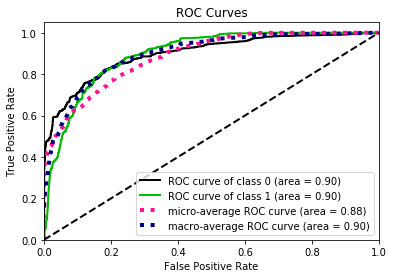

In [51]:
y_pred_test  = best_model.predict_proba(X_test)
skplt.metrics.plot_roc (y_test,y_pred_test)

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


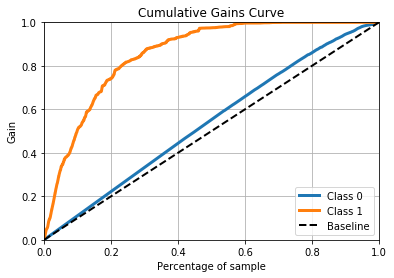

In [52]:
y_pred_test  = best_model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_pred_test)

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


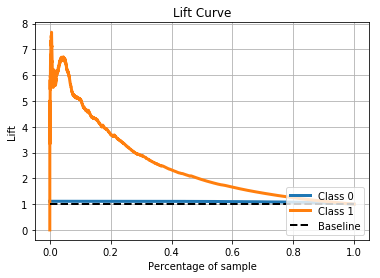

In [54]:
y_pred_test  = best_model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_test)

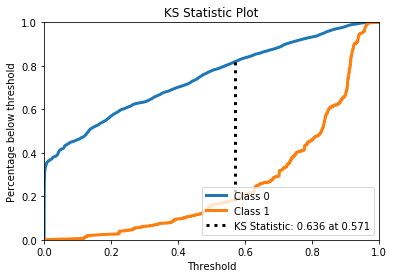

In [56]:
y_pred_test  = best_model.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)
plt.show()

(0, 1)

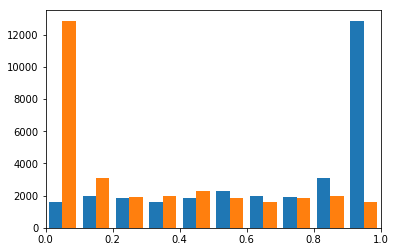

In [57]:
#we can seethe probability of the predicted values
import matplotlib.pyplot as plt
plt.rcParams['font.size']=10
#histogram
plt.hist(y_pred_test,bins=10)
plt.xlim(0,1)

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


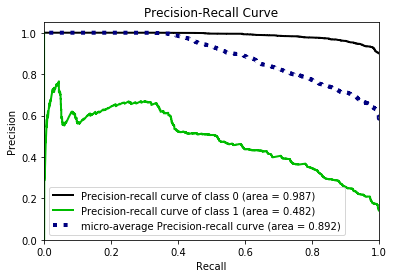

In [60]:
y_pred_test  = best_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)
plt.show()

In [61]:
gini_index=2*90# roc value
gini_index

180

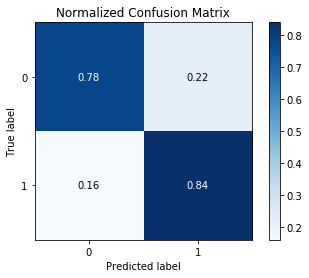

In [62]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_tes, normalize=True)
plt.show()

percentage of responders predicted correctly  =  88%
percentage of Non-responders predicted correctly = 90%

In [63]:
print(metrics.classification_report(y_test, y_pred_tes))

             precision    recall  f1-score   support

          0       0.98      0.78      0.87     27917
          1       0.30      0.84      0.44      3096

avg / total       0.91      0.78      0.82     31013



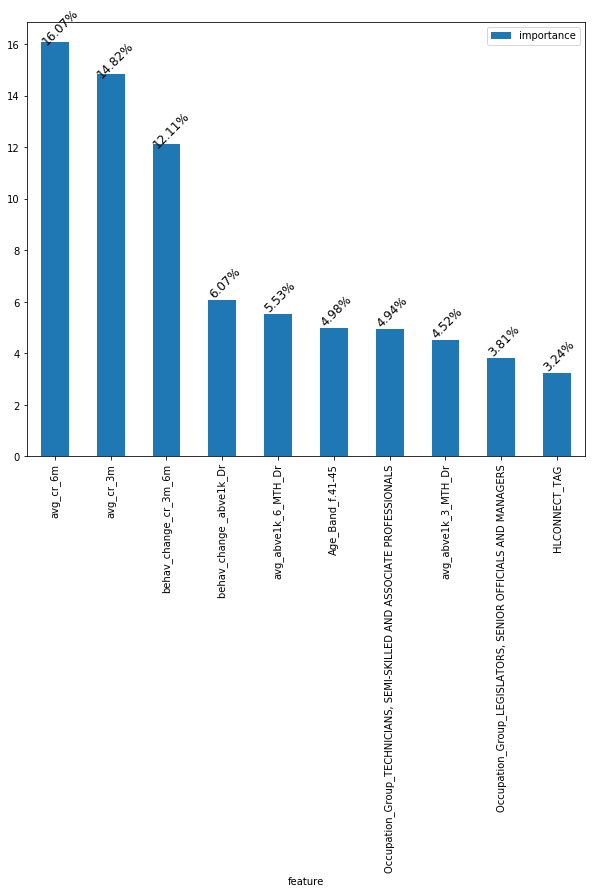

In [82]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier

names = df9.columns
rf = RandomForestClassifier().fit(x_train,y_train)
rf.fit(x_train,y_train)
#print ("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names),reverse=True))
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rf.feature_importances_,4)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
ax=importances.iloc[:10,:].plot.bar(figsize=(10,8))
#plt.figure(figsize=(30,25))
#importances

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03,i.get_height()+1,\
            str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)#total)*100


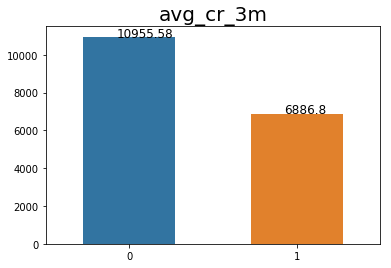

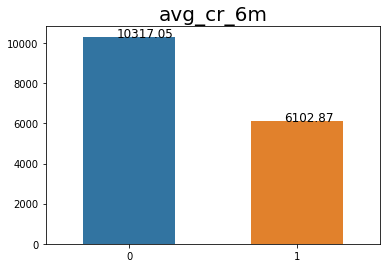

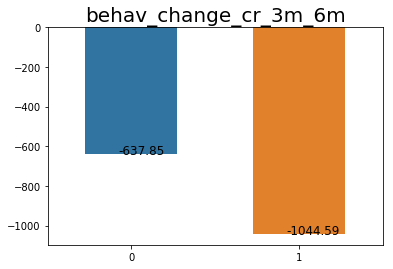

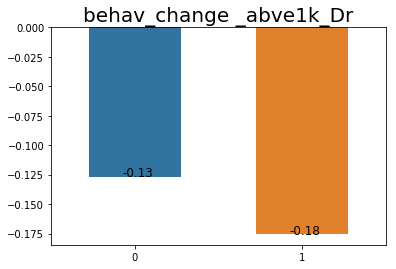

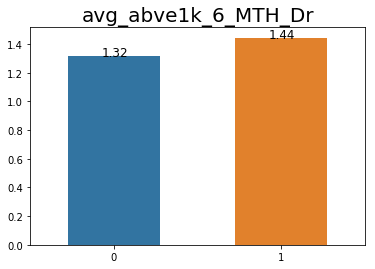

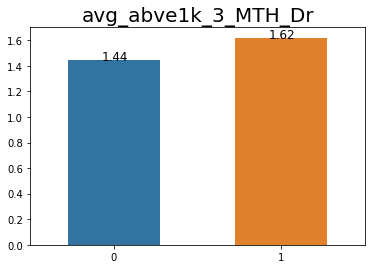

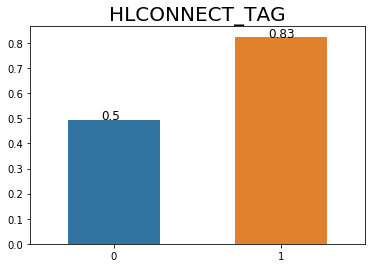

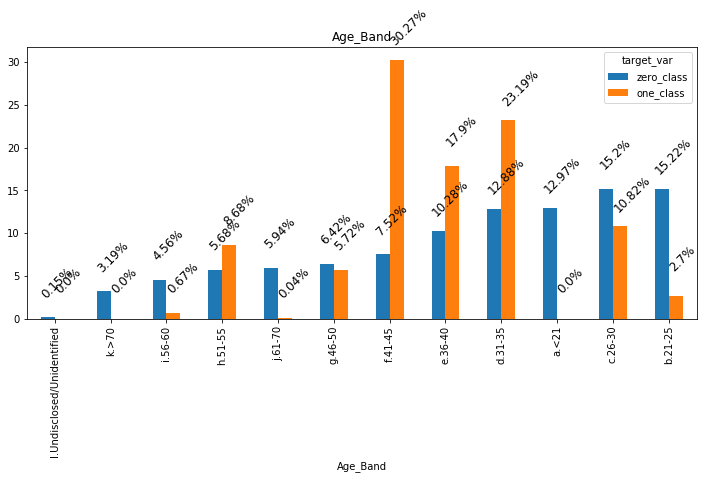

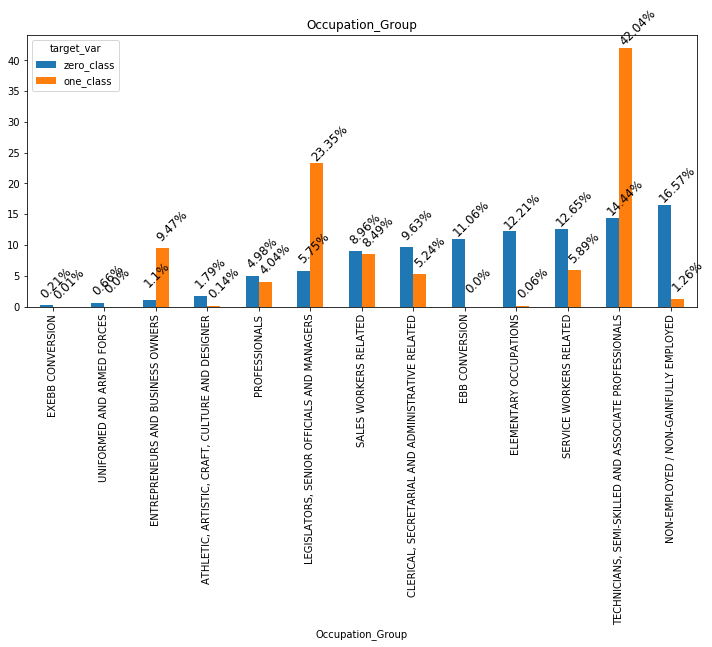

In [87]:
num_lst=['avg_cr_3m', 'avg_cr_6m', 'behav_change_cr_3m_6m','behav_change _abve1k_Dr', 'avg_abve1k_6_MTH_Dr','avg_abve1k_3_MTH_Dr','HLCONNECT_TAG']
for var in num_lst:
    def means(var):
        dff=df9[[var,'target_var']]
        g=dff.groupby('target_var').agg('mean')
        dfs = pd.DataFrame(g, index=[0,1]).rename(columns={0:'mean_zero_class',1:'mean_one_class'})
        ax=sns.barplot(x=dfs.index, y=np.array(dfs.values).ravel())
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(var,fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
            filename = 'C:\\Users\\tvimal\\Desktop\\' + str(var) +'.png'
            plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')
    plt.show(means(var))
#######################
cat_lst=['Age_Band','Occupation_Group']
for name  in cat_lst: 

    fnl=pd.crosstab(index=df9[name], columns=df9['target_var'])
    fnl['zero_class']=np.round(fnl[0]/fnl[0].sum(),4)*100
    fnl['one_class']=np.round(fnl[1]/fnl[1].sum(),4)*100
    okk=fnl[['zero_class','one_class']].sort_values(by='zero_class')#,ascending=False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    ax=okk[['zero_class','one_class']].plot(kind='bar', figsize=(12,5),title=name,grid=False)#subplots=True
    #plt.annotate( label,  (okk.index,okk['one_class'].values),   xytext=(0, space), textcoords="offset points", ha='center', va=va)
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03,i.get_height()+ 5,\
                str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)
        filename = 'C:\\Users\\tvimal\\Desktop\\' + str(name) +'.png'
        plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')

In [74]:
######Logistic-regression model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#------------------------------------
Log_reg=LogisticRegression(C=0.02)#
Log_reg.fit(x_train_res,y_train_res)
y_pred=Log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred),'confusion_matrix')
print('LOGISTIC REGRESSION=',(metrics.accuracy_score (y_test, y_pred))*100)
#-----------------------------
classifier=GaussianNB()
classifier.fit(x_train_res,y_train_res)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred),'confusion_matrix')
print('NAIVE BAYES=',(metrics.accuracy_score (y_test, y_pred))*100)
#------------------------------
'''classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train_res,y_train_res)
y_pred=classifier.predict(X_test)
#classifier.probability=True
print(confusion_matrix(y_test,y_pred),'confusion_matrix')
print('SVM =',(metrics.accuracy_score (y_test, y_pred))*100)'''
#------------------------------
classifier=DecisionTreeClassifier( random_state =0,criterion='entropy')
classifier.fit(x_train_res,y_train_res)
y_pred=classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred),'confusion_matrix')
print('DECISION TREE =',(metrics.accuracy_score (y_test, y_pred))*100)
#---------------------------------
classifier=RandomForestClassifier(n_estimators=300, random_state =0,criterion='entropy')
classifier.fit(x_train_res,y_train_res)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred),'confusion_matrix')
print('RANDOM FOREST=',(metrics.accuracy_score (y_test, y_pred))*100)
#-------------------

classifier=XGBClassifier()
classifier.fit(x_train_res,y_train_res)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred),'confusion_matrix')
print(' XGB CLASSIFIER =',(metrics.accuracy_score (y_test, y_pred))*100)

[[21476  6441]
 [  438  2681]] confusion_matrix
LOGISTIC REGRESSION= 77.83541693517206
[[10871 17046]
 [   15  3104]] confusion_matrix
NAIVE BAYES= 45.02835416935172
[[26616  1301]
 [  556  2563]] confusion_matrix
[[26616  1301]
 [  556  2563]] confusion_matrix
DECISION TREE = 94.01662585384715
[[27462   455]
 [  611  2508]] confusion_matrix
RANDOM FOREST= 96.56527903080294
[[22846  5071]
 [  330  2789]] confusion_matrix
 XGB CLASSIFIER = 82.5976285603815


C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


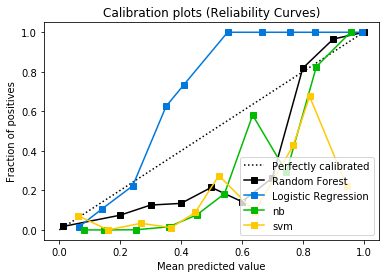

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
svm = LinearSVC()

rf_probas = rf.fit(x_train, y_train).predict_proba(x_test)
lr_probas = lr.fit(x_train, y_train).predict_proba(x_test)
nb_probas = nb.fit(x_train, y_train).predict_proba(X_test)
svm_scores = svm.fit(x_train, y_train).decision_function(X_test)
probas_list = [rf_probas, lr_probas,nb_probas,svm_scores]
clf_names = ['Random Forest', 'Logistic Regression','nb','svm']
skplt.metrics.plot_calibration_curve(y_test,probas_list,clf_names)


# SCORE DATA

In [68]:
import teradata
import pandas as pd
host,user,pwd ='10.132.4.11','tsatish', "Ranu!654321"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SELECT * from dw_ckm.Training_casa_score_data  '''
    Scoredata = pd.read_sql(query,session)  
#print(df.columns.tolist()) #columns 
Scoredata.shape

(10000, 67)

In [69]:
Scoredata=Scoredata.set_index('Party_Id',drop=True)
##
sc =Scoredata[['Age_Band', 'Marital_status', 'Gender', 'Occupation_Group','CASA_DR_6_MTH_AMT','CASA_CR_6_MTH_AMT',
'abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr',
'CASA_CR_3_MTH_AMT','CASA_DR_3_MTH_AMT','HLCONNECT_TAG']]
sc.shape
####related to 6month 
sc['avg_cr_6m']=sc['CASA_CR_6_MTH_AMT']/3
sc['avg_dr_6m']=sc['CASA_DR_6_MTH_AMT']/3
sc[['abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr']]=sc[['abve10k_6_MTH_Dr','abve1k_6_MTH_Dr','abve10k_3_MTH_Dr','abve1k_3_MTH_Dr']].replace(np.nan,0)
sc['avg_abve10k_6_MTH_Dr']=sc['abve10k_6_MTH_Dr']/3
sc['avg_abve1k_6_MTH_Dr']=sc['abve1k_6_MTH_Dr']/3
#related to 3month 
sc['avg_cr_3m']=sc['CASA_CR_3_MTH_AMT']/2
sc['avg_dr_3m']=sc['CASA_DR_3_MTH_AMT']/2
sc['avg_abve10k_3_MTH_Dr']=sc['abve10k_3_MTH_Dr']/2
sc['avg_abve1k_3_MTH_Dr']=sc['abve1k_3_MTH_Dr']/2
#behavoiur change related to amount
col=['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']
sc[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']]=sc[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']].replace(np.nan,1)
sc['behav_change_cr_3m_6m']=sc['avg_cr_6m']-sc['avg_cr_3m']
sc['behav_change_dr_3m_6m']=sc['avg_dr_6m']-sc['avg_dr_3m']
sc[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']]=sc[['avg_cr_6m','avg_cr_3m','avg_dr_6m','avg_dr_3m']].replace(1,np.nan)

#behavoiur change related to above 10k and 1k

sc['behav_change _abve10k_Dr']=sc['avg_abve10k_6_MTH_Dr']-sc['avg_abve10k_3_MTH_Dr']
sc['behav_change _abve1k_Dr']=sc['avg_abve1k_6_MTH_Dr']-sc['avg_abve1k_3_MTH_Dr']

##
sc_data=sc[['Age_Band', 'Marital_status', 'Gender', 'Occupation_Group', 'avg_cr_6m', 'avg_abve1k_6_MTH_Dr', 
'avg_cr_3m', 'avg_abve1k_3_MTH_Dr', 'behav_change_cr_3m_6m', 'behav_change _abve10k_Dr', 'behav_change _abve1k_Dr','HLCONNECT_TAG']]
sc_data


C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Age_Band,Marital_status,Gender,Occupation_Group,avg_cr_6m,avg_abve1k_6_MTH_Dr,avg_cr_3m,avg_abve1k_3_MTH_Dr,behav_change_cr_3m_6m,behav_change _abve10k_Dr,behav_change _abve1k_Dr,HLCONNECT_TAG
Party_Id,,,,,,,,,,,,
12592653,c.26-30,02.Single,01.Male,SERVICE WORKERS RELATED,2337.406667,0.000000,2822.710,0.0,-485.303333,0.000000,0.000000,1.0
1275908,h.51-55,01.Married,02.Female,NON-EMPLOYED / NON-GAINFULLY EMPLOYED,163.766667,0.000000,198.495,0.0,-34.728333,0.000000,0.000000,0.0
1671258,e.36-40,02.Single,02.Female,PROFESSIONALS,1252.970000,0.333333,1096.420,0.0,156.550000,0.000000,0.333333,1.0
20472147,c.26-30,02.Single,02.Female,SALES WORKERS RELATED,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,1.0
10295031,i.56-60,03.Unknown,01.Male,NON-EMPLOYED / NON-GAINFULLY EMPLOYED,122.666667,0.000000,552.365,0.0,-429.698333,0.000000,0.000000,0.0
46205719,e.36-40,02.Single,01.Male,SALES WORKERS RELATED,NaN,0.000000,NaN,0.0,0.000000,0.000000,0.000000,1.0
30384887,c.26-30,01.Married,01.Male,SERVICE WORKERS RELATED,3576.950000,0.000000,3466.530,0.0,110.420000,0.000000,0.000000,0.0
38995682,c.26-30,02.Single,01.Male,PROFESSIONALS,128.183333,0.000000,149.590,0.0,-21.406667,0.000000,0.000000,1.0
3469835,k.>70,01.Married,01.Male,NON-EMPLOYED / NON-GAINFULLY EMPLOYED,133.333333,0.000000,236.540,0.0,-103.206667,0.000000,0.000000,0.0


In [70]:
sc_data.isnull().any()

Age_Band                    False
Marital_status              False
Gender                      False
Occupation_Group             True
avg_cr_6m                    True
avg_abve1k_6_MTH_Dr         False
avg_cr_3m                    True
avg_abve1k_3_MTH_Dr         False
behav_change_cr_3m_6m       False
behav_change _abve10k_Dr    False
behav_change _abve1k_Dr     False
HLCONNECT_TAG               False
dtype: bool

In [71]:
from sklearn.preprocessing import Imputer
df9[['avg_cr_6m','avg_cr_3m']]=df9[['avg_cr_6m','avg_cr_3m']].replace(1001,np.nan)
columns_to_impute = ['avg_cr_6m','avg_cr_3m']
sc_data[columns_to_impute] = Imputer().fit_transform(sc_data[columns_to_impute])
sc_data['Occupation_Group']=sc_data['Occupation_Group'].replace(np.nan,'TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFESSIONALS')

score_data=pd.get_dummies(sc_data)
sc_data.isnull().any()
score_data

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,avg_cr_6m,avg_abve1k_6_MTH_Dr,avg_cr_3m,avg_abve1k_3_MTH_Dr,behav_change_cr_3m_6m,behav_change _abve10k_Dr,behav_change _abve1k_Dr,HLCONNECT_TAG,Age_Band_a.<21,Age_Band_b.21-25,Age_Band_c.26-30,Age_Band_d.31-35,Age_Band_e.36-40,Age_Band_f.41-45,Age_Band_g.46-50,Age_Band_h.51-55,Age_Band_i.56-60,Age_Band_j.61-70,Age_Band_k.>70,Age_Band_l.Undisclosed/Unidentified,Marital_status_01.Married,Marital_status_02.Single,Marital_status_03.Unknown,Marital_status_04.Widowed,Marital_status_05.Divorced/Seperated,Gender_01.Male,Gender_02.Female,Gender_03.Undisclosed,"Occupation_Group_ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER","Occupation_Group_CLERICAL, SECRETARIAL AND ADMINISTRATIVE RELATED",Occupation_Group_EBB CONVERSION,Occupation_Group_ELEMENTARY OCCUPATIONS,Occupation_Group_ENTREPRENEURS AND BUSINESS OWNERS,Occupation_Group_EXEBB CONVERSION,"Occupation_Group_LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",Occupation_Group_NON-EMPLOYED / NON-GAINFULLY EMPLOYED,Occupation_Group_PROFESSIONALS,Occupation_Group_SALES WORKERS RELATED,Occupation_Group_SERVICE WORKERS RELATED,"Occupation_Group_TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFESSIONALS",Occupation_Group_UNIFORMED AND ARMED FORCES
Party_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12592653,2337.406667,0.000000,2822.710000,0.0,-485.303333,0.000000,0.000000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1275908,163.766667,0.000000,198.495000,0.0,-34.728333,0.000000,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1671258,1252.970000,0.333333,1096.420000,0.0,156.550000,0.000000,0.333333,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20472147,49078.682368,0.000000,54512.303734,0.0,0.000000,0.000000,0.000000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10295031,122.666667,0.000000,552.365000,0.0,-429.698333,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46205719,49078.682368,0.000000,54512.303734,0.0,0.000000,0.000000,0.000000,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30384887,3576.950000,0.000000,3466.530000,0.0,110.420000,0.000000,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
38995682,128.183333,0.000000,149.590000,0.0,-21.406667,0.000000,0.000000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3469835,133.333333,0.000000,236.540000,0.0,-103.206667,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [72]:
# Get missing columns in the training test
missing_cols = set( x.columns ) - set( score_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    score_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
score_data = score_data[x.columns]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
score_data=sc.fit_transform(score_data)
print("backtest input shape",score_data.shape)
##########scoring new data
score = best_model.predict_proba(score_data)
score2 = best_model.predict(score_data)
prob=score[:,1]

backtest input shape (10000, 40)


# Lead Generation

In [75]:
PL_Casa_BASE_LEADS=pd.DataFrame({'Party_ID':sc_data.index,'Model_Probability':prob,'Target':score2})
PL_Casa_BASE_LEADS = PL_Casa_BASE_LEADS.sort_values(by=['Model_Probability'], ascending=[False])
PL_Casa_BASE_LEADS = PL_Casa_BASE_LEADS.reset_index(drop=True)
PL_Casa_BASE_LEADS

,Party_ID,Model_Probability,Target
0,20037568,1.000000e+00,1
1,396983,9.999831e-01,1
2,13185620,9.957250e-01,1
3,2017680,9.918880e-01,1
4,1535520,9.916436e-01,1
5,2913427,9.906472e-01,1
6,25762324,9.903798e-01,1
7,13490953,9.902440e-01,1
8,15176508,9.894432e-01,1
9,4332527,9.885904e-01,1


In [195]:
check=Scoredata[['dt_opened']]
check['dt_opened']=check['dt_opened'].astype(str)
import numpy as np
lst=[]
for i in check['dt_opened']:
    if i== 'None':
        lst.append(0)
    else :
        lst.append(1)
check['target']=list(lst)
check['target'].value_counts()

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0    9904
1      96
Name: target, dtype: int64

In [201]:
t=check[check['target']==1]
t

,dt_opened,target
Party_Id,,
10339748,2018-06-28,1
10777801,2018-03-13,1
38330328,2018-05-30,1
10863126,2018-05-30,1
3300264,2018-04-26,1
352173,2018-01-24,1
38330328,2017-02-21,1
1612608,2017-06-19,1
2542458,2018-04-26,1
